### Charles Douglas

### Project #4, September 16th, 2022 
### Project Title: INN Hotels: Hotel Booking Cancellation Prediction (Supervised Learning Classification)


### Post Graduate program in Data Science and Business Analytics, McCombs School of Business, University of Texas-Austin

### This assignment demonstrates Python coding skills building Logistic Regression models and Decision Tree models. 



## **Table of Contents**

### 1 - Problem Statement

### 2 - Data Overview

### 3 - Exploritory Data Analysis

### 4 - Data Preprocessing 

### 5 - Mini-Exploritory Data Analysis

### 6 - Data Preparation for Modeling

### 7  - Building a Logistic Regression 

### 8 - Building a Decision Tree Model

### 9 - Observations and Recomendations 

## **Section #1 - Problem Statement**

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

### Analytical Plan
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

* Use The Logistic Regression and Decision Tree models to identify most significant predictors of booking status

### **This analysis provides three deliverables for the client**

1. analyze the data provided to find which factors have a high influence on booking cancellations

2. Build a predictive model that can predict which booking is going to be canceled in advance

3. Formulating profitable policies for cancellations and refunds.

## Importing necessary libraries and data

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [9]:
# Suppress warnings messages
import warnings
warnings.filterwarnings('ignore')

# data managment libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

# remove the limit for the number of displayed valiables and records
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# statistical analysis library
import scipy.stats as stats
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# model building libraries
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# data splitting library
from sklearn.model_selection import train_test_split

# decision tree classifier library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# model refinement tool
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# metric score libraries
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### Read data file from Google drive

In [10]:
# set up google drive
from google.colab import drive
drive.mount('/content/drive')
#
# reading data from the google drive
df = pd.read_csv('/content/drive/MyDrive/Python Course/INNHotelsGroup.csv')
#
# copying data to avoid any changes to original
df_save = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Section #2 - Data Overview**

- Observations
- Sanity checks

In [239]:
# data file shape
df.shape

(36275, 19)

In [240]:
# random sample of the data file
df.sample(n=5, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled


In [241]:
# check data names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [242]:
# Checking duplicates
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [243]:
# checking for duplicate records
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [244]:
# statistical summary of the quantitative variables in the data file
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [245]:
# statistical summary of the qualitative variables in the data file
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [246]:
# show catagorical variable levels
cat_columns = df.describe(include=['object']).columns
cat_columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [247]:
from os import name
for i in cat_columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts())
    print('*' * 10)

Unique values in Booking_ID are :
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
**********
Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**********
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**********
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**********
Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**********


## **Data Overview Comments**

#### **Data Structure**
* The data file has 36275 records and 19 variables
* Five varables are formated as objects and may need to be converted to categorical formt
* One varable 'arrival_year' is formated as an integer and many need to be converted to a data format
* The remaing 13 variables are formatted as integer or floating point numbers
* No duplicate recors are detected
* Variables with categorical levels are: Type_of_meal_plan - 4 levels, Room_Type - 7 levels, market_segment_type - 5 levels, repeated_guest - 2 levels, no_of_special_requests - 6 levels, booking_status - 2 levels

#### **Variables**
* The median number of adult guests is 2.0 per booking, and the median number of children is 0.0 per booking. 
* The median number of weekend nights is 1.0 per booking, and the median number of week nights is 2.0 per booking.
children is 0.0 per booking. 
* Needing car bookings is low, the mean request is 0.03 per booking
* The median booking time to arrival time is 57 days and the mean is 85 days, suggesting skewed data.
* Per booking the mean repeted guest is 0.03
* Per booking the mean number of previous cancellations is 0.02, and the mean number of bookings without cancelations is 0.15
* The mean price per room is €112.38, and the median price is €107.00,suggesting skewed data.
* The median number of special requests is 1, and the mean is 0.77, suggesting skewed data.
* Meal plan #1 is most poular, freuency was 31863
* Room Type #1 is the most popular, frequency = 29730
* The most populat market segment is 34169, frequency = 34169
* booking that are not canceled are 28089 out of 42576 books

## **Section #3 - Exploratory Data Analysis (EDA)**

* Part 1 - Six specific questions
* Part 2 - General Exploratory Data Analysis (EDA)

#### Load functions for EDA graphics

In [11]:
# function to create combination histogram and boxplot
#
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    '''
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots with % on top
#  X-axis sorted by magnitude
#
def labeled_barplot_x(data, feature, perc=False, n=None):
    '''
   
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to create labeled barplots for categorical and numerical variables
# X-axis sorted by x values (small to large)

def labeled_barplot_y(data, feature, perc=False, n=None):
    '''
    
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage
        
 # show the plot       

In [14]:
# Print the category counts and plot a stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

####**EDA Part 1- Six Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### **Question #1.** What are the busiest months in the hotel?

In [254]:
# count customers per arrival month
df['arrival_month'].value_counts(sort=True)

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

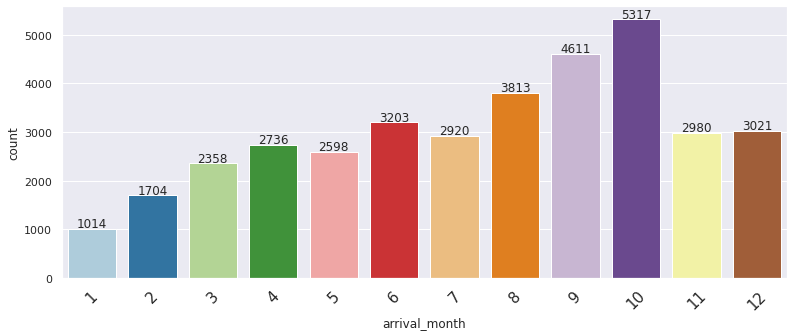

In [255]:
# Month
labeled_barplot_y(df, 'arrival_month')

#### Comments
* The three most popular months are August (3813), September (4611), and October (5317)

#### **Question #2.** Which market segment do most of the guests come from?

In [256]:
# count customers per market segment
#from numpy.core.fromnumeric import sort
df['market_segment_type'].value_counts(sort=True)

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

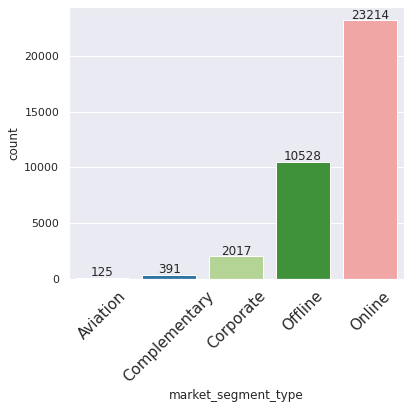

In [257]:
# market type
labeled_barplot_y(df, 'market_segment_type');
plt.show()

#### Comments
* Aviation brought in 125 bookings
* The were 391 Complimentary bookings
* Offline brought in 10528 bookings
* Online brought in 2314 bookings, the majority of bookings

#### **Question # 3.** Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [258]:
df_1 = df[df['market_segment_type'] == 'Aviation']
df_mean1 = df_1['avg_price_per_room'].mean()
print('Aviation mean: €',round(df_mean1, 2))

Aviation mean: € 100.7


In [259]:
df_2 = df[df['market_segment_type'] == 'Complementary']
df_mean2 = df_2['avg_price_per_room'].mean()
print('Complementary mean: €',round(df_mean2, 2))

Complementary mean: € 3.14


In [260]:
df_3 = df[df['market_segment_type'] == 'Corporate']
df_mean3 = df_3['avg_price_per_room'].mean()
print('Corporate mean: €',round(df_mean3, 2))

Corporate mean: € 82.91


In [261]:
df_4 = df[df['market_segment_type'] == 'Offline']
df_mean4 = df_4['avg_price_per_room'].mean()
print('Offline mean: €',round(df_mean4, 2))

Offline mean: € 91.63


In [262]:
df_5 = df[df['market_segment_type'] == 'Online']
df_mean5 = df_5['avg_price_per_room'].mean()
print('Online mean: €',round(df_mean5, 2))

Online mean: € 112.26


#### Comments
* Aviation mean: € 100.7
* Complementary mean: € 3.14
* Corporate mean: € 82.91
* Offline mean: € 91.63
* Online mean: € 112.26
* Most booking are facilitated vis Online and Offline means, the mean room price via an Offline process bring the greater price compared to all other methods

#### **Question #4**. What percentage of bookings are canceled?

In [263]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

#### Comments
* 33% of booking are canceled

#### **Question #5.** Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled  All
repeated_guest                             
1                     16           914  930
All                   16           914  930
------------------------------------------------------------------------------------------------------------------------


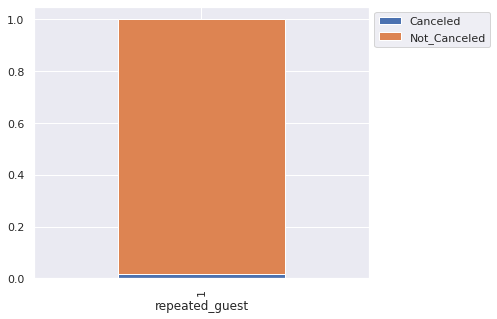

In [ ]:
# repeated_guest & booking_status
stacked_barplot(df[df['repeated_guest']==1], 'repeated_guest', 'booking_status') 

#### Comments
* 16 repeat guests canceled out of 930 repeat guests

#### **Question #6.** Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                         3340         13158  16498
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


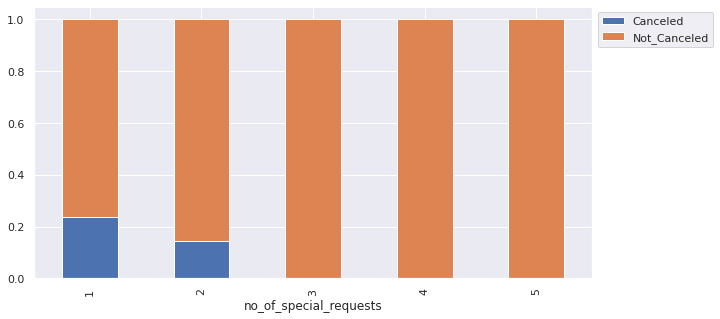

In [17]:
# no_of_special_requests & booking_status
stacked_barplot(df[df['no_of_special_requests']>0], 'no_of_special_requests', 'booking_status') 

#### Comments
* 16498 guests requested special accomidations
* 3340 of the 16498 guests canceled
* 13158 of the 16498 guests did not cancel

#### **EDA Part 2 - General Exploratory Data Analysis (EDA)**

#### Guest demographics

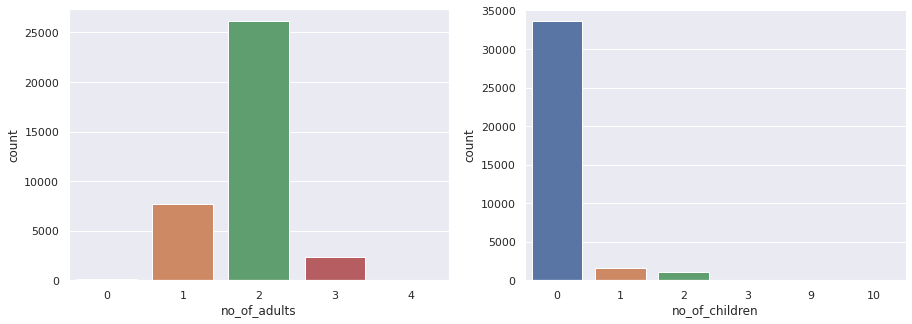

In [ ]:
# Guest demographics
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x='no_of_adults', ax=ax[0]);
sns.countplot(data=df, x='no_of_children', ax=ax[1]);

### Comments:
* Majority of booking include two adults and no children.
* There is small number of bookings with up to 10 children

#### Weekend and Weekday bookings

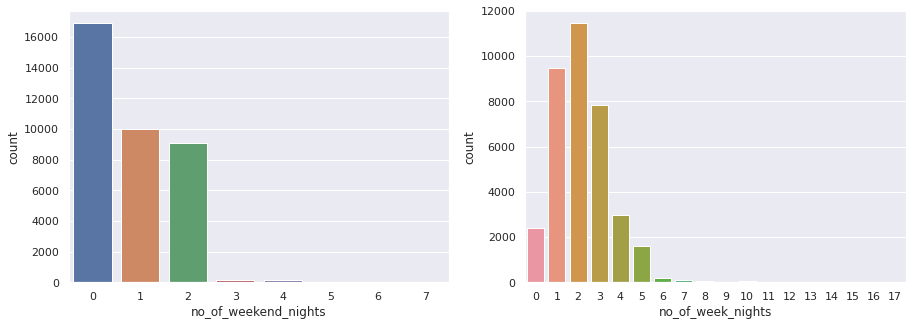

In [ ]:
# Weekend and Weekday bookings
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x='no_of_weekend_nights', ax=ax[0]);
sns.countplot(data=df, x='no_of_week_nights', ax=ax[1]);

#### Comments:
* The majoity of weekday books were for 2 days, most booking ranged from 1 to 3 days
* Weekend books appear to include some weekdays

#### Reserved parking space

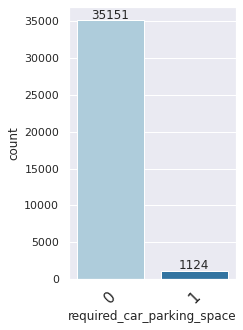

In [ ]:
# required_car_parking_space
labeled_barplot_x(df, 'required_car_parking_space');

#### Comments
* 1124 bookings reserved parking space, while 3551 booking did not

#### Leadtime from booking to arrival

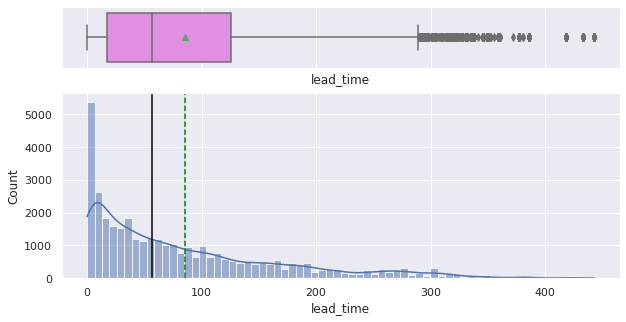

In [ ]:
# lead_time
histogram_boxplot(df, 'lead_time', kde=True)

#### Comments
* The median time from booking to arrival is 57 days, and the mean is 86
* Data has a positive (right) skew with many outliers

#### Arrival Year

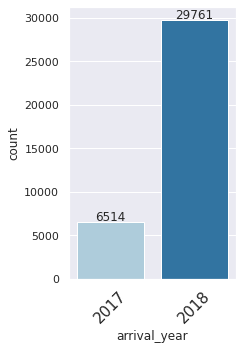

In [ ]:
# year
labeled_barplot_y(df, 'arrival_year')

#### Comments
* The were substantially more guest arrivals in 2018 (29761) compared to 2017 (6514)

#### Arrival Month

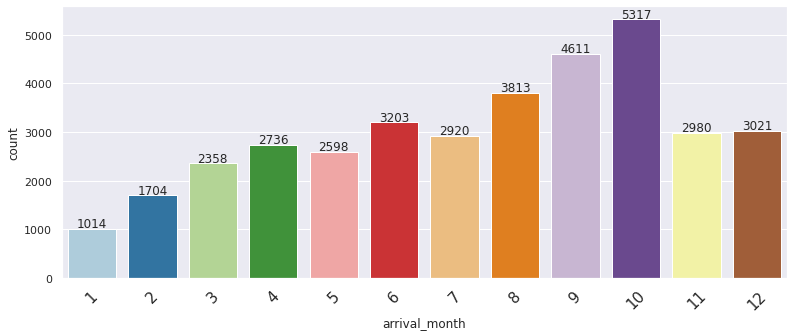

In [ ]:
# Month
labeled_barplot_y(df, 'arrival_month')

#### Comments
* The three most popular months are August (3813), September (4611), and October (5317)

#### Arrival Day of the Month

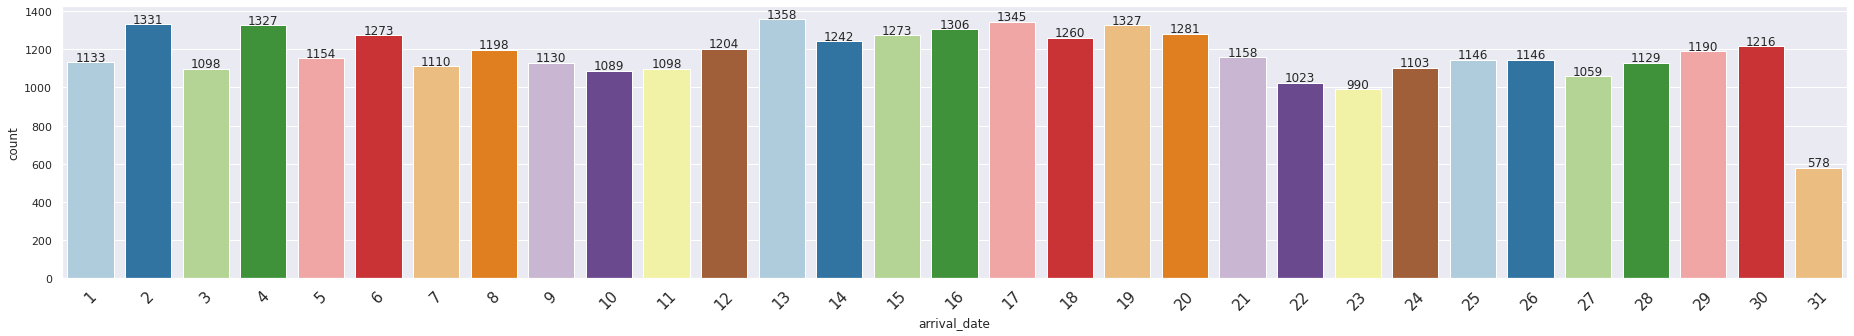

In [ ]:
# Day
labeled_barplot_y(df, 'arrival_date')

#### Comments
* The day of month does not provide actionable information
* Converting to days of the week may be more informative
* the low number of 31st is due to the fact not all months have 31 days

#### Repeated guests

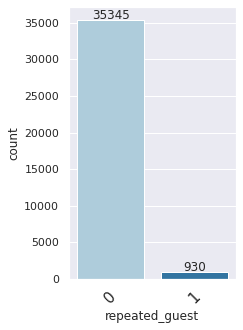

In [ ]:
labeled_barplot_x(df, 'repeated_guest')

#### Comments
* 930 bookings are repeated guests

#### Cancelations

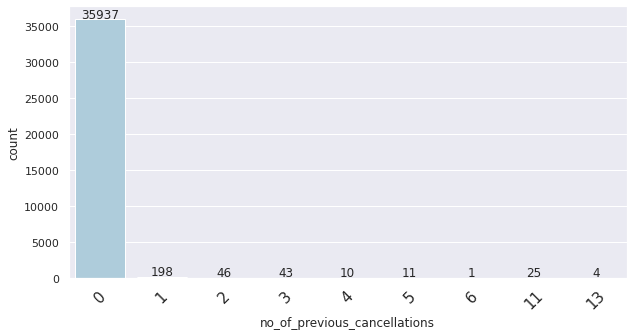

In [ ]:
# Cancelations
labeled_barplot_y(df, 'no_of_previous_cancellations');

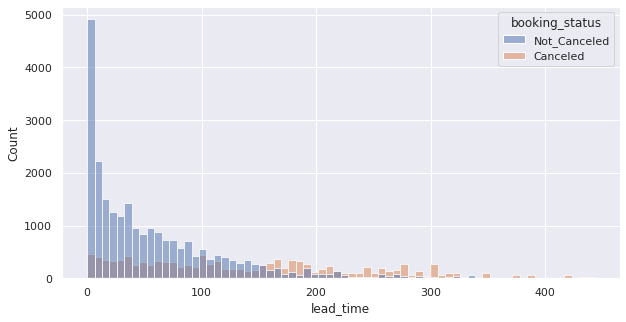

In [ ]:
# lead time and booking_status
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', hue='booking_status');

#### Comments
* 35937 bookings were not canceled
* There were NNN bookings cancelled
* The two top outliers- 25 guest canceled bookings 11 times (275 cancelations), and 4 guest cancelled bookings 13 times (52 cancelations)
* As the lead_time increases, chance of cancellation increases

#### Average room price

In [ ]:
df['avg_price_per_room'].describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

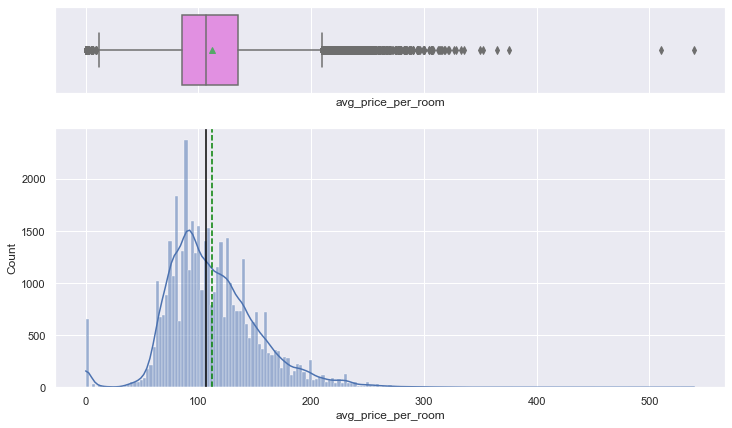

In [ ]:
histogram_boxplot(df, 'avg_price_per_room', kde =True)

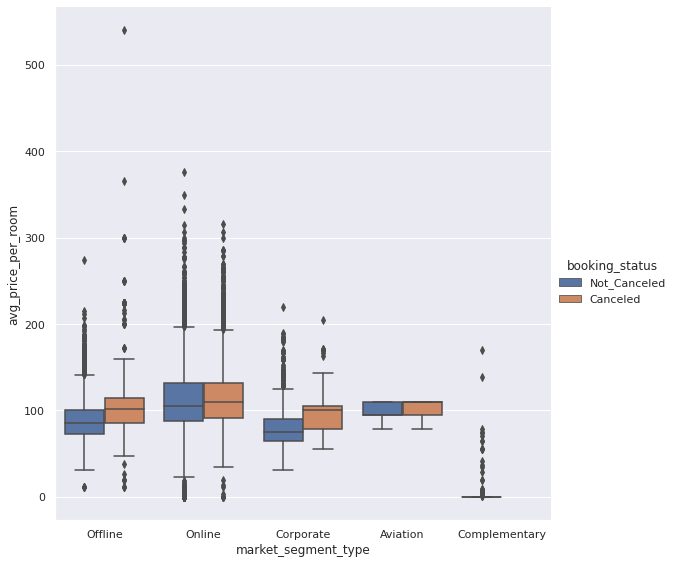

In [ ]:
# Room price by marketing demographic
sns.catplot(data=df, y='avg_price_per_room', x='market_segment_type', hue='booking_status', kind='box', \
            height=8);

#### Comments
* Median price is €99.45, and the mean is €103.42
* Data is positive (right) skewed with many outliers
* Data includes complementary bookings that lowers the mean price
* There is a difference booking status with Offline, Corporate, and Compimenary market types

### Meal plans

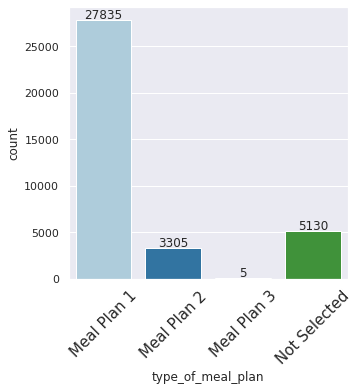

In [ ]:
# meals
labeled_barplot_y(df, 'type_of_meal_plan');
plt.show()

#### Comments
* The majority (27835) selected Meal Plan 1 (breakfast only)
* 3305 bookings selected Meal plan 2
* 5 bookings selected Meal plan 3 (three meals)
* 5130 bookings did not select a meal plan

### Room Type

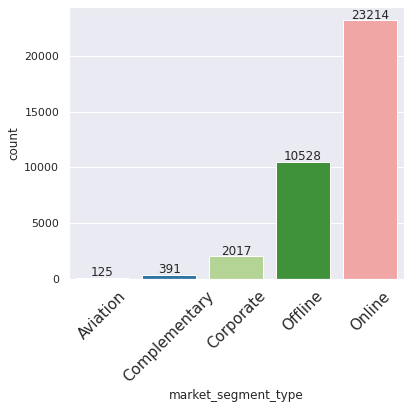

In [ ]:
# room type
labeled_barplot_y(df, 'market_segment_type');
plt.show()

#### Comments
* Aviation brought in 125 bookings
* The were 391 Complimentary bookings
* Offline brought in 10528 bookings
* Online brought in 2314 bookings, the majority of bookings

#### Booking Status

In [ ]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

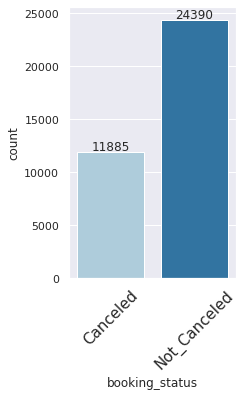

In [ ]:
# Booking Status
labeled_barplot_y(df, 'booking_status');
plt.show()

#### Comments
* 33% (n=11885) bookings were cancelled
* 67% (n=24390) bookings were not cancelled
* Repeated guests account for only 16 cancelations out of 930 bookings

#### Correlations

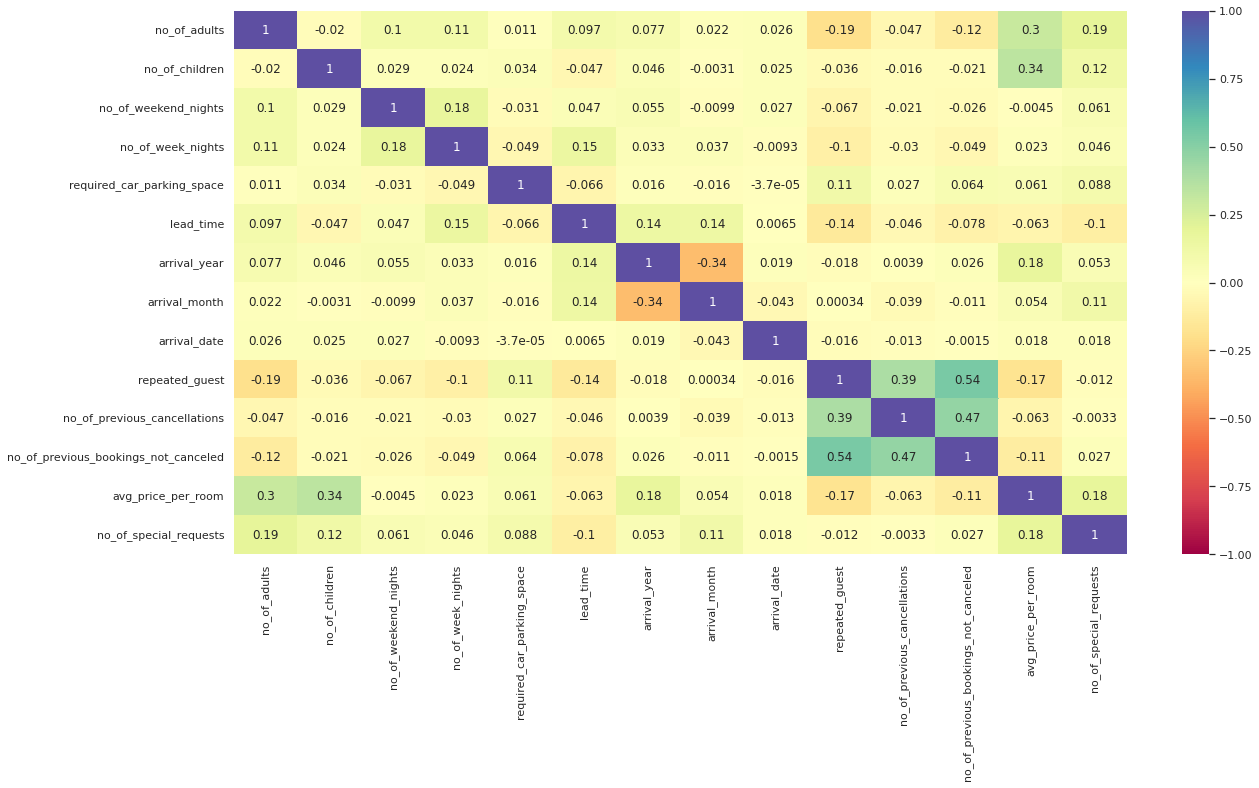

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.show()

#### Comments
* The strongest correletion is a moderate 0.54 between repeated guest who have not cancelled
* There is a moderate correletion 0.47 between number of previous cancelations and number of non-cancelations
* There is a weak correletion 0.39 between repeated guests and number of previous cancelations

## **EDA Comments**

**Demographics**
* Majority of booking include two adults and no children, there is small number of bookings with up to 10 children

**Bookings**
* The majoity of weekday books were for 2 days, most booking ranged from 1 to 3 days, Weekend books appear to include some weekdays.
* 1124 bookings reserved parking space, while 3551 booking did not
* The median time from booking to arrival is 57 days, and the mean is 86 days, and the data has a positive (right) skew with many outliers
* The were substantially more guest arrivals in 2018 (29761) compared to 2017 (6514)

**Booking Times**
* The three most popular months are August (3813), September (4611), and October (5317)
* The day of month does not provide actionable information. Converting to days of the week may be more informative

**Cancellations**
* 35937 bookings were not canceled, there were 847 bookings from guests with previous cancellations
* The two top outliers- 25 guest canceled bookings 11 times (275 cancelations), and 4 guest cancelled bookings 13 times (52 cancelations)
* As the lead_time increases, chance of cancellation increases

**Room Price**
* Median room price is €99.45, and the mean is €103.42, data is positive (right) skewed with many outliers
* Data includes complementary bookings that lowers the mean price

**Booking Status**
* There is a difference in booking status with Offline, Corporate, and Compimenary market types
* The majority (27835) selected Meal Plan 1 (breakfast only), 3305 bookings selected Meal plan 2, 5 bookings selected Meal plan 3 (three meals), and 5130 bookings did not select a meal plan

**Marketing Type**
* Aviation brought in 125 bookings, The were 391 Complimentary bookings, Offline brought in 10528 bookings, and Online brought in 2314 bookings, the majority of bookings
* Bookings:
* 33% (n=11885) bookings were cancelled, and 67% (n=24390) bookings were not cancelled. 

## **Section #4 -Data Preprocessing**
 
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Copy imported data file

In [ ]:
# Make copy of initial data set
df0 = df.copy()

#### Check for missing data

In [ ]:
# check for missing values
df0.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Comments
* no missing data found

#### Check for duplicate records

In [280]:
dup_rows = df0[df0.duplicated()]
dup_rows.sum()

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

#### Comments
* No missing records detected

#### Check for outlier data points

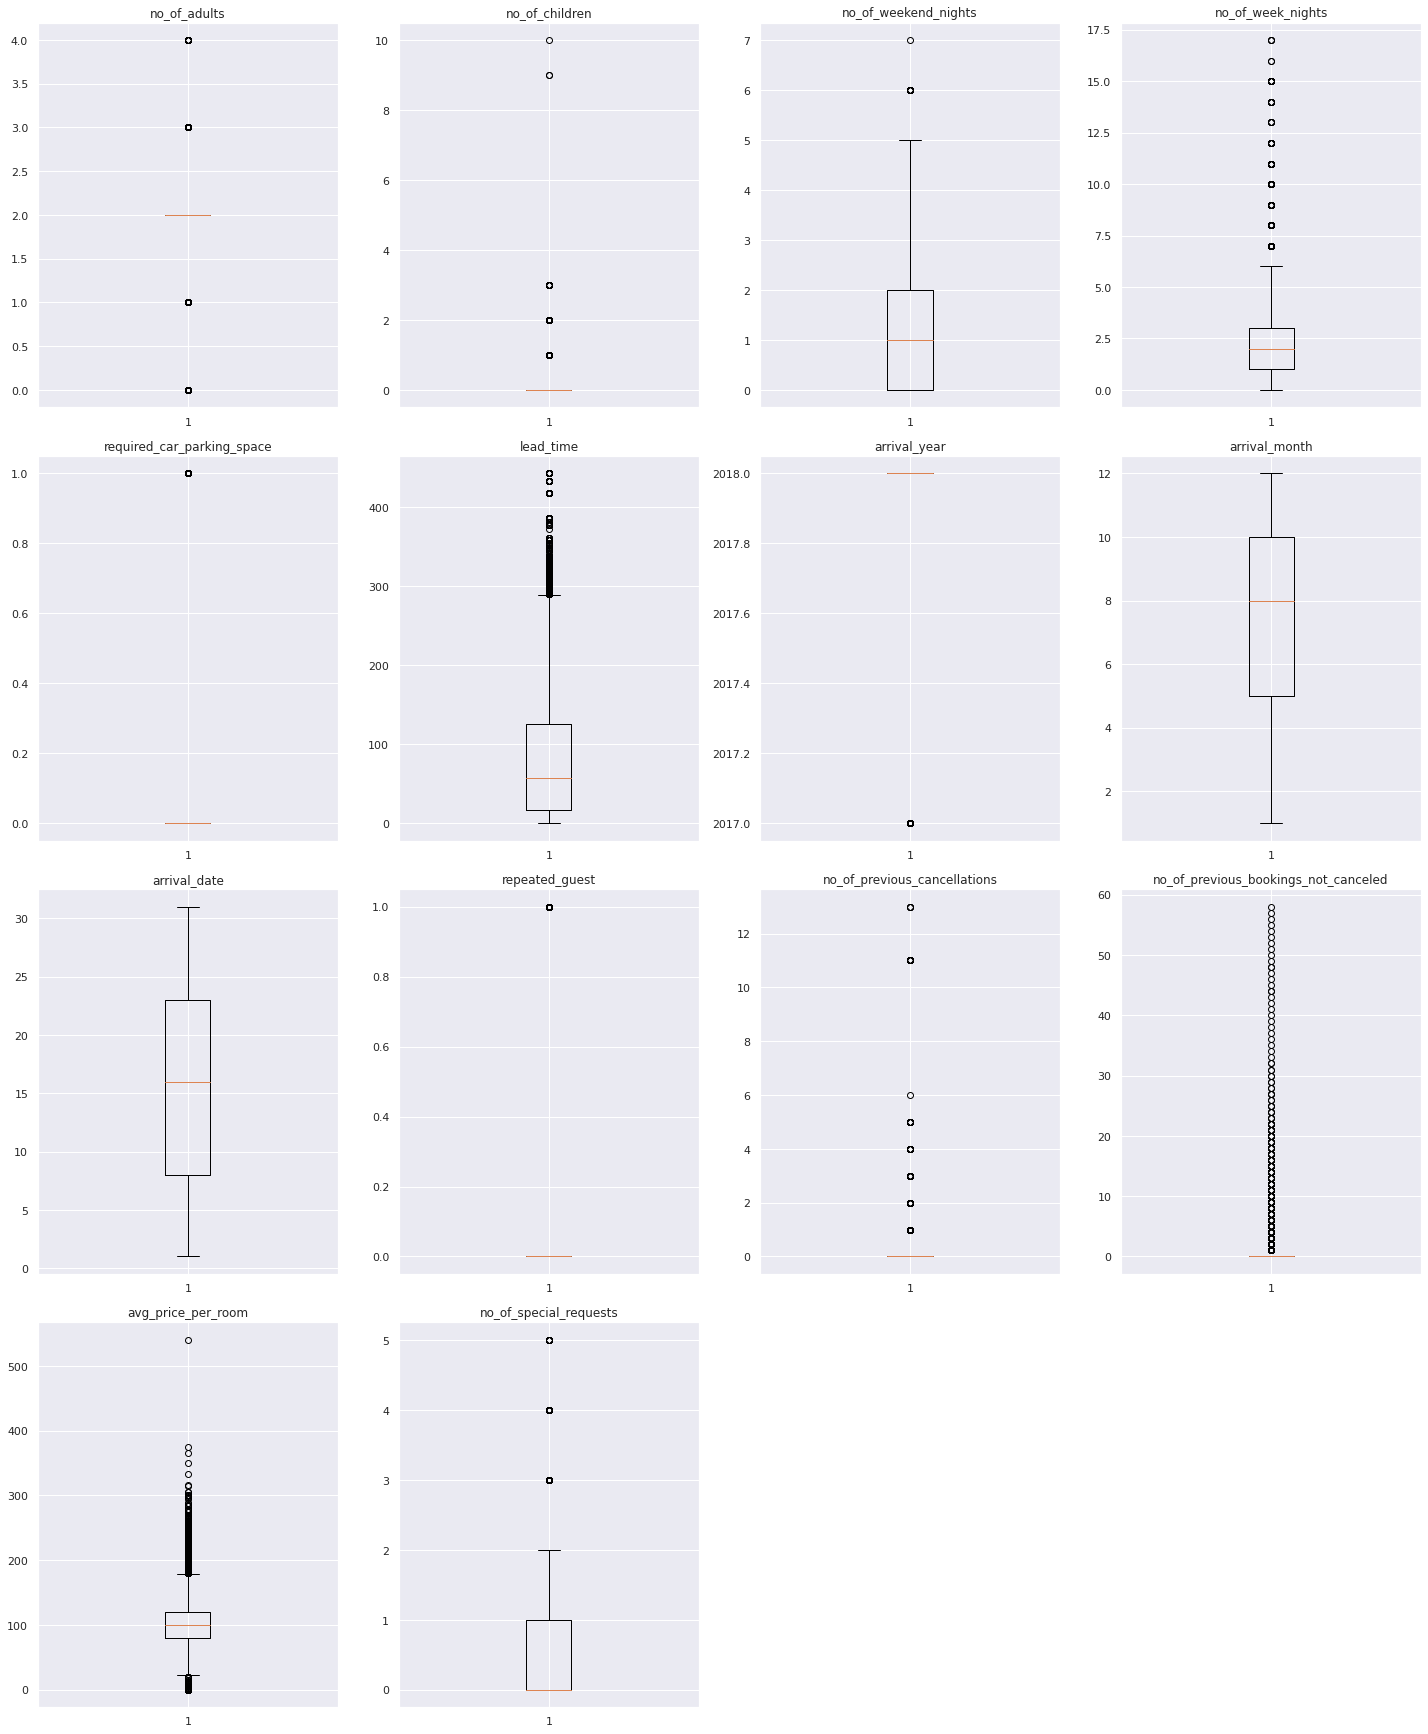

In [283]:
# Outlier detection
numerical_col = df0.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df0[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Comments
* Many outliers detected
* will not clip outlier data that will reduce information even if may influence logistic regression results

#### Feature engineering
* Convert object formated variables to a category format

In [282]:
# Convert object strings to catagorical variables
for feature in df0.columns: 
    if df0[feature].dtype == 'object': 
        df0[feature] = pd.Categorical(df0[feature])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

#### Comments
* Variables converted to category format
* Converted variables are: Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status     

## Section #5 - Mini EDA
* Minimal data manipulation was performed
* A limited EDA is performed

#### Guest demographics

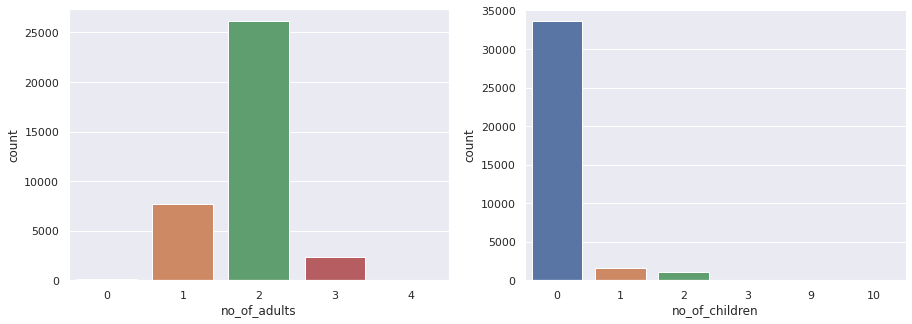

In [ ]:
# Guest demographics
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x='no_of_adults', ax=ax[0]);
sns.countplot(data=df, x='no_of_children', ax=ax[1]);

### Comments:
* Majority of booking include two adults and no children.
* There is small number of bookings with up to 10 children

#### Weekend and Weekday bookings

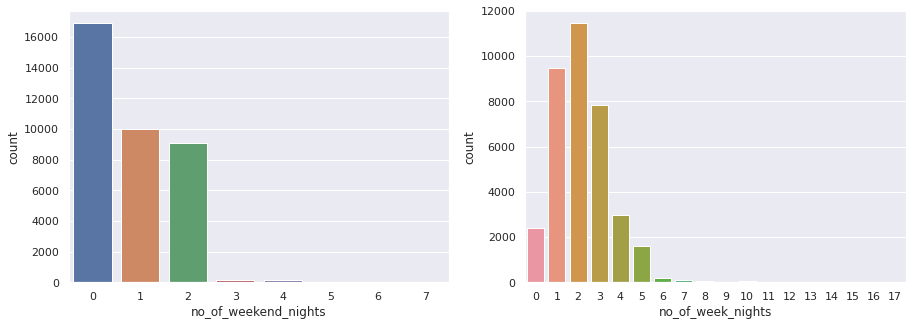

In [ ]:
# Weekend and Weekday bookings
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x='no_of_weekend_nights', ax=ax[0]);
sns.countplot(data=df, x='no_of_week_nights', ax=ax[1]);

#### Comments:
* The majoity of weekday books were for 2 days, most booking ranged from 1 to 3 days
* Weekend books appear to include some weekdays

#### Reserved parking space

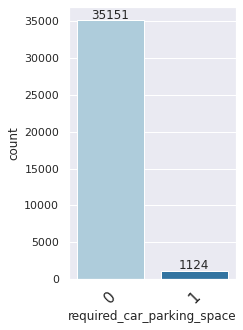

In [ ]:
# required_car_parking_space
labeled_barplot_x(df, 'required_car_parking_space');

#### Comments
* 1124 bookings reserved parking space, while 3551 booking did not

#### Leadtime from booking to arrival

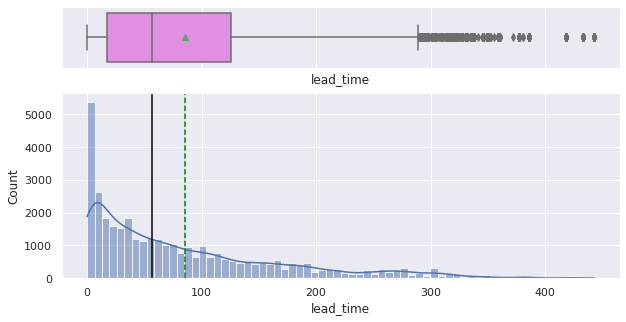

In [ ]:
# lead_time
histogram_boxplot(df, 'lead_time', kde=True)

#### Comments
* The median time from booking to arrival is 57 days, and the mean is 86
* Data has a positive (right) skew with many outliers

#### Arrival Year

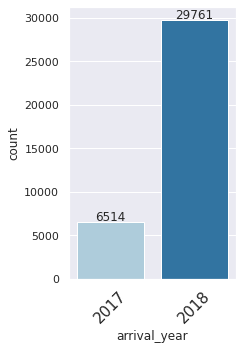

In [ ]:
# year
labeled_barplot_y(df, 'arrival_year')

#### Comments
* The were substantially more guest arrivals in 2018 (29761) compared to 2017 (6514)

#### Arrival Month

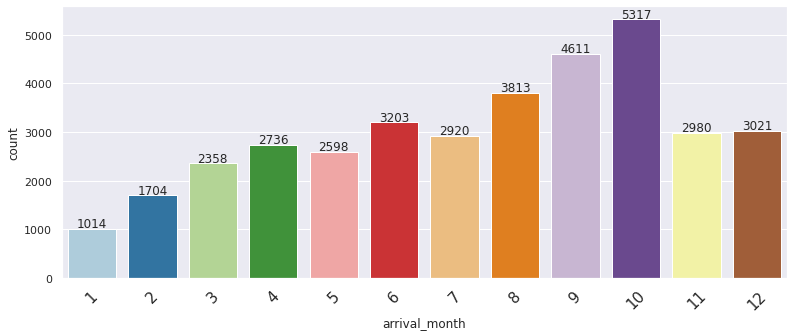

In [ ]:
# Month
labeled_barplot_y(df, 'arrival_month')

#### Comments
* The three most popular months are August (3813), September (4611), and October (5317)

#### Arrival Day of the Month

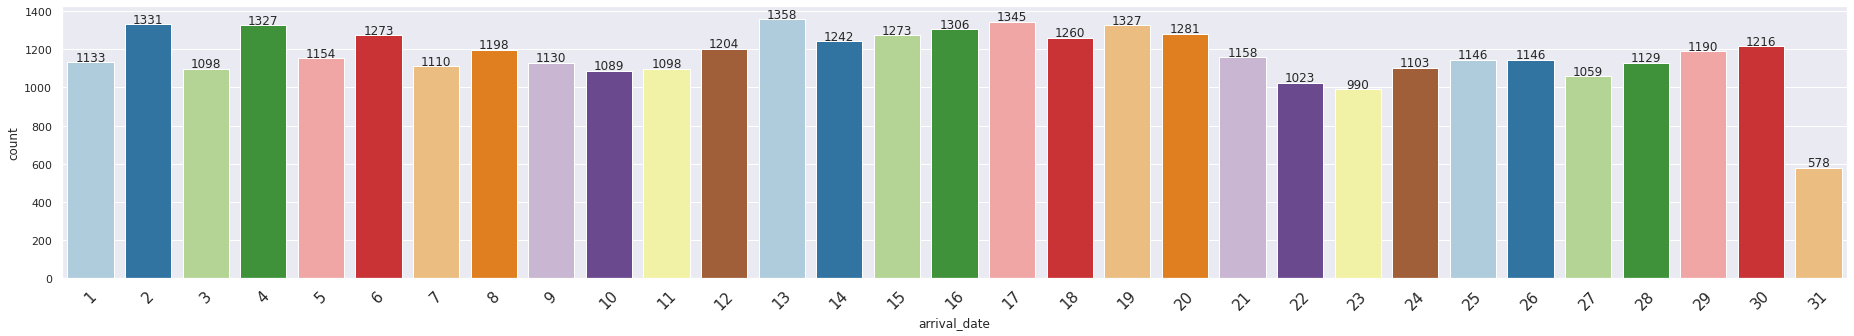

In [ ]:
# Day
labeled_barplot_y(df, 'arrival_date')

#### Comments
* The day of month does not provide actionable information
* Converting to days of the week may be more informative
* the low number of 31st is due to the fact not all months have 31 days

#### Repeated guests

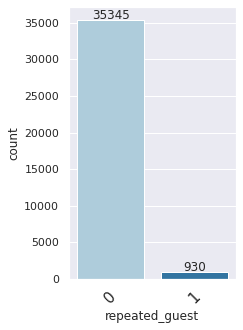

In [ ]:
labeled_barplot_x(df, 'repeated_guest')

#### Comments
* 930 bookings are repeated guests

#### Cancelations

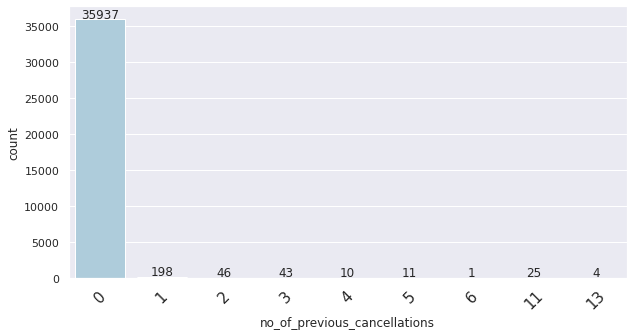

In [ ]:
# Cancelations
labeled_barplot_y(df, 'no_of_previous_cancellations');

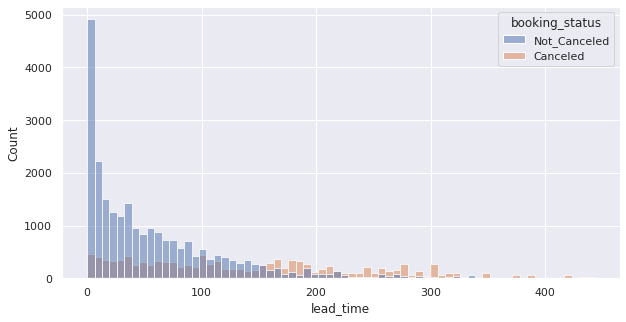

In [ ]:
# lead time and booking_status
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', hue='booking_status');

#### Comments
* 35937 bookings were not canceled
* There were NNN bookings cancelled
* The two top outliers- 25 guest canceled bookings 11 times (275 cancelations), and 4 guest cancelled bookings 13 times (52 cancelations)
* As the lead_time increases, chance of cancellation increases

#### Average room price

In [ ]:
df['avg_price_per_room'].describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

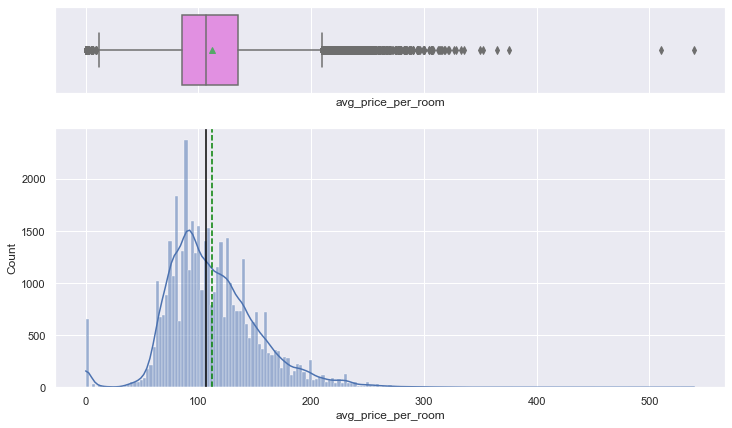

In [ ]:
histogram_boxplot(df, 'avg_price_per_room', kde =True)

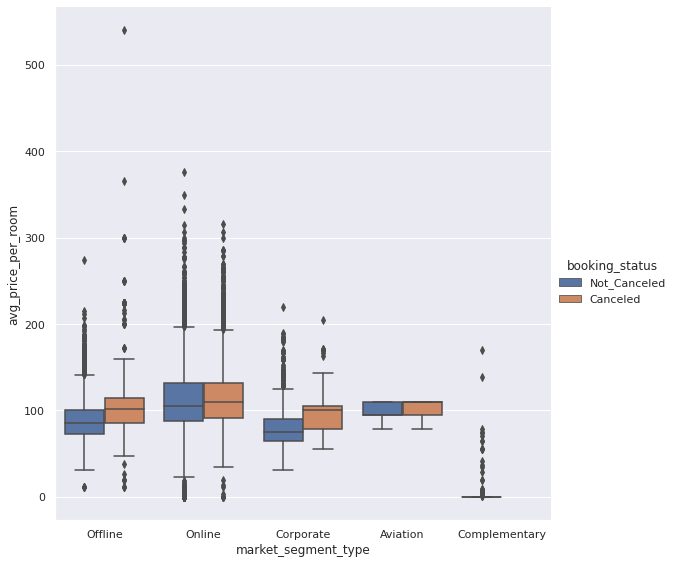

In [ ]:
# Room price by marketing demographic
sns.catplot(data=df, y='avg_price_per_room', x='market_segment_type', hue='booking_status', kind='box', \
            height=8);

#### Comments
* Median price is €99.45, and the mean is €103.42
* Data is positive (right) skewed with many outliers
* Data includes complementary bookings that lowers the mean price
* There is a difference booking status with Offline, Corporate, and Compimenary market types

### Meal plans

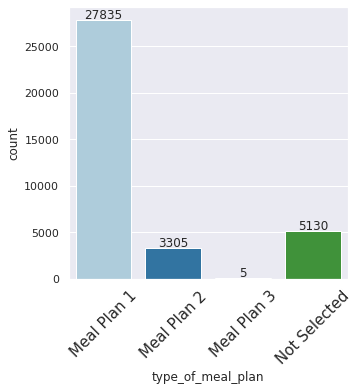

In [ ]:
# meals
labeled_barplot_y(df, 'type_of_meal_plan');
plt.show()

#### Comments
* The majority (27835) selected Meal Plan 1 (breakfast only)
* 3305 bookings selected Meal plan 2
* 5 bookings selected Meal plan 3 (three meals)
* 5130 bookings did not select a meal plan

### Room Type

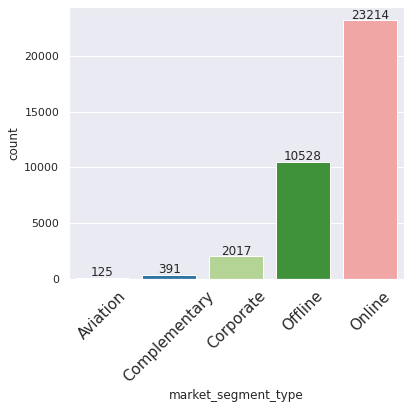

In [ ]:
# room type
labeled_barplot_y(df, 'market_segment_type');
plt.show()

#### Comments
* Aviation brought in 125 bookings
* The were 391 Complimentary bookings
* Offline brought in 10528 bookings
* Online brought in 2314 bookings, the majority of bookings

#### Booking Status

In [ ]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

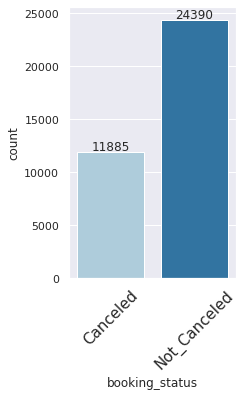

In [ ]:
# Booking Status
labeled_barplot_y(df, 'booking_status');
plt.show()

#### Comments
* 33% (n=11885) bookings were cancelled
* 67% (n=24390) bookings were not cancelled
* Repeated guests account for only 16 cancelations out of 930 bookings

#### Correlations

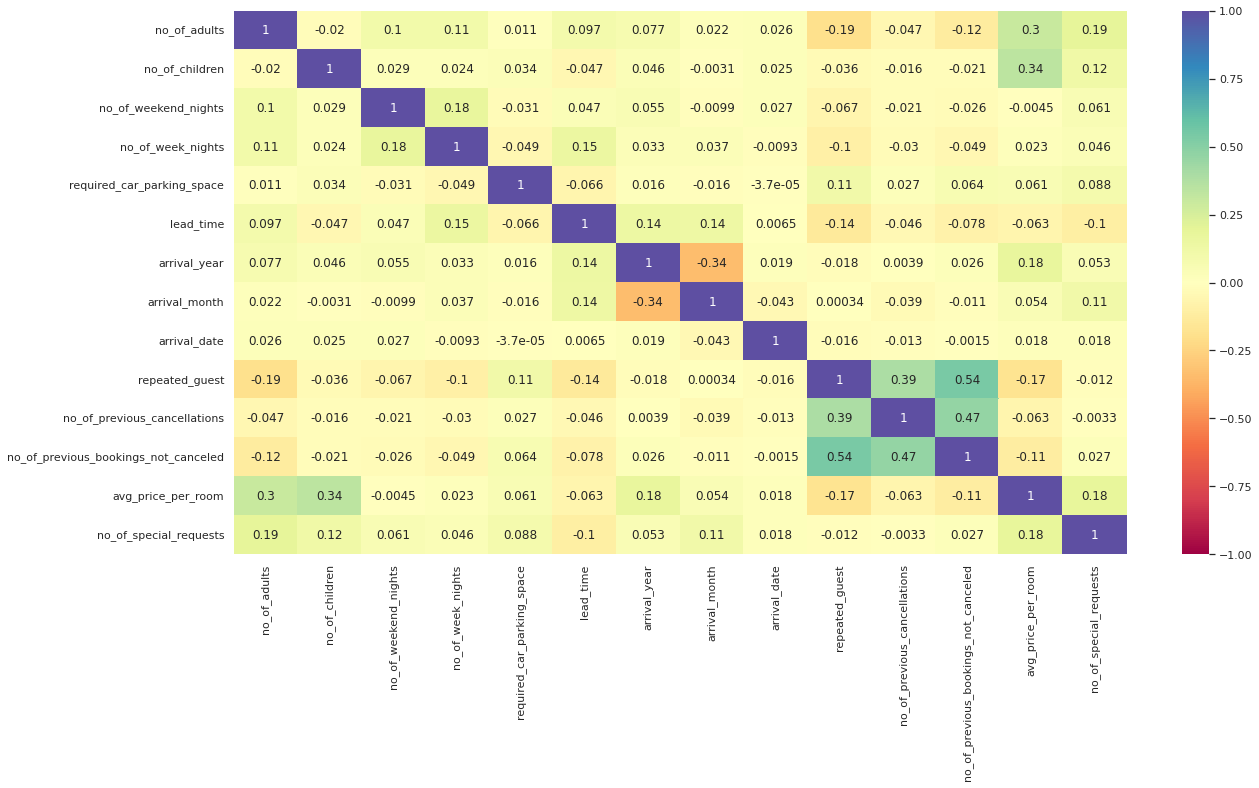

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.show()

#### Comments
* The strongest correletion is a moderate 0.54 between repeated guest who have not cancelled
* There is a moderate correletion 0.47 between number of previous cancelations and number of non-cancelations
* There is a weak correletion 0.39 between repeated guests and number of previous cancelations

## **EDA Comments**

**Demographics**
* Majority of booking include two adults and no children, there is small number of bookings with up to 10 children

**Bookings**
* The majoity of weekday books were for 2 days, most booking ranged from 1 to 3 days, Weekend books appear to include some weekdays.
* 1124 bookings reserved parking space, while 3551 booking did not
* The median time from booking to arrival is 57 days, and the mean is 86 days, and the data has a positive (right) skew with many outliers
* The were substantially more guest arrivals in 2018 (29761) compared to 2017 (6514)

**Booking Times**
* The three most popular months are August (3813), September (4611), and October (5317)
* The day of month does not provide actionable information. Converting to days of the week may be more informative

**Cancellations**
* 35937 bookings were not canceled, there were 847 bookings from guests with previous cancellations
* The two top outliers- 25 guest canceled bookings 11 times (275 cancelations), and 4 guest cancelled bookings 13 times (52 cancelations)
* As the lead_time increases, chance of cancellation increases

**Room Price**
* Median room price is €99.45, and the mean is €103.42, data is positive (right) skewed with many outliers
* Data includes complementary bookings that lowers the mean price

**Booking Status**
* There is a difference in booking status with Offline, Corporate, and Compimenary market types
* The majority (27835) selected Meal Plan 1 (breakfast only), 3305 bookings selected Meal plan 2, 5 bookings selected Meal plan 3 (three meals), and 5130 bookings did not select a meal plan

**Marketing Type**
* Aviation brought in 125 bookings, The were 391 Complimentary bookings, Offline brought in 10528 bookings, and Online brought in 2314 bookings, the majority of bookings
* Bookings:
* 33% (n=11885) bookings were cancelled, and 67% (n=24390) bookings were not cancelled. 

##**Section #6 - Data Preparation for Modeling**

#### Convert string values of the dependent variable to integers
#### booking_status value to Canceled=0 and Not_Canceled=1 

In [284]:
# Convert booking_status value to Canceled=0 and Not_Canceled=1 
df0['booking_status'] = df0['booking_status'].apply(lambda x: 0 if x == 'Canceled' else 1)

#### Remove Booking_ID variable

In [285]:
df0 = df0.drop(['Booking_ID'], axis=1)

#### setup the dependent variable = X, and the independent variables = Y
#### adding a constant to the independent variables
#### creating dummy variables and drop first level

In [286]:
# specifying the independent and dependent variables
X = df0.drop(['booking_status'], axis=1)
Y = df0['booking_status']
#
# adding a constant to the independent variables
X = sm.add_constant(X)
#
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#### split data into 70% for the training data set to 30 % for the testing data set
#### Stratify option used to maintain original distribution of cancel & not_canceled levels of the dependednt variable

In [287]:
# split data into 70:30 ratio for train data set to test data set
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### Training and testing data set shapes and percentage of cancel & not_canceled results in each data set

In [288]:
# Print training and testing ata set shapes and percentage of classes in each data set
print('Shape of Training set : ', x_train.shape)
print('Shape of test set : ', x_test.shape, '\n')
print('Percentage of classes in training set:',)
print(y_train.value_counts(normalize=True), '\n')
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28) 

Percentage of classes in training set:
1    0.670644
0    0.329356
Name: booking_status, dtype: float64 

Percentage of classes in test set:
1    0.676376
0    0.323624
Name: booking_status, dtype: float64


##**Section #7 -  Building a Logistic Regression model**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicted a non-defaulter as a defaulter - False Positive
2. Model predicted a defaulter as a non-defaulter - False Negative

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

### Create a Baseline Model
* Fitting Logistic Regression model to obtain baseline results and accuracy score

In [289]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

pred_train = lg.predict(x_train)
pred_train = np.round(pred_train)

print(lg.summary(), '\n')

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.3293
Time:                        00:10:11   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  924.5923    120.817      7.653      0.000     687.795    1161.390
no_of_adults                            -0.1135      

### Check model accuracy

In [290]:
print('Accuracy on training set : ', accuracy_score(y_train, pred_train))

Accuracy on training set :  0.8060412728418399


### Install functions for confusion matrix

In [291]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [292]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking Baseline model performance on the training data set

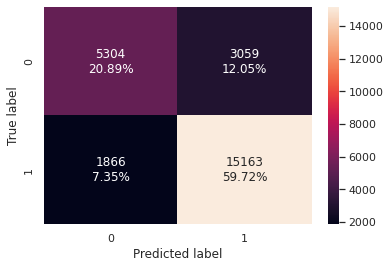

In [293]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_train, y_train)

### Check Baseline model for Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

#### Load functions for checking multicollinearity

In [294]:
# Part 1- Test for multicoliniarity with VIF
#
from statsmodels.stats.outliers_influence import variance_inflation_factor
#
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns

    # calculating VIF for each feature
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [295]:
# Part 2- Test for multicoliniarity with VIF
#
def treating_multicollinearity(predictors, target, high_vif_columns):
    '''
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    '''
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            'col': high_vif_columns,
            'Adj. R-squared after_dropping col': adj_r2,
            'RMSE after dropping col': rmse,
        }
    ).sort_values(by='Adj. R-squared after_dropping col', ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

#### Check VIF results for multicolinearity of the baseline model
* drop variables with VIF greater than 5

In [296]:
# check VIF for multicolinearity
checking_vif(x_train)

,feature,VIF
0,const,3.946816e+07
1,no_of_adults,1.348154e+00
2,no_of_children,1.978229e+00
3,no_of_weekend_nights,1.069475e+00
4,no_of_week_nights,1.095667e+00
5,required_car_parking_space,1.039928e+00
6,lead_time,1.394914e+00
7,arrival_year,1.430830e+00
8,arrival_month,1.275673e+00
9,arrival_date,1.006738e+00


#### Drop variable 'market_segment_type_Online' to high VIF result
* create x_train1 data set

In [299]:
# Drop variable due to high VIF value
x_train1 = x_train.drop('market_segment_type_Online', axis=1,)

#### Recheck for Multicolinearity

In [300]:
# check VIF for multicolinearity
checking_vif(x_train1)

,feature,VIF
0,const,3.939137e+07
1,no_of_adults,1.331784e+00
2,no_of_children,1.977350e+00
3,no_of_weekend_nights,1.069039e+00
4,no_of_week_nights,1.095118e+00
5,required_car_parking_space,1.039795e+00
6,lead_time,1.390637e+00
7,arrival_year,1.428376e+00
8,arrival_month,1.274625e+00
9,arrival_date,1.006721e+00


#### Comments
* No variables with VIF results over 5.0

#### Checking model accruracy results after dropping one variable due to high VIF results

In [301]:
# fitting the model on training set
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(disp=False)

pred_train1 = lg1.predict(x_train1)
pred_train1 = np.round(pred_train1)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

Accuracy on training set :  0.805765595463138


### Observations:
* There is no significant change in the current model's accuracy results compared to the accuracy result (0.81) with the baseline model.

### Checking for insignificant variables (p-value > 0.05 ) for removal

In [302]:
# summary of logistic regression model
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.3292
Time:                        00:26:56   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  933.3324    120.655      7.736      0.000     696.852    1169.813
no_of_adults                            -0.1060      

### Using a loop process to drop variables with high p-values

In [303]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


### Observations:
* Variables with p-values =< 0.5 identified

#### Create x_train2 dataset configured with statistically significal variables (p-values => 0.5)  

In [305]:
x_train2 = x_train1[selected_features]

In [306]:
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.3283
Time:                        00:29:47   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            917.2860    120.456      7.615      0.000     681.196    1153.376
no_of_adults                      -0.1086      0.037     -2.914      0.

### Observations:
* No variables observed to have a p-value greater than 0.05

### **lg2 and x_train2 is the final model**

#### Converting coefficients to odds

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

#### Calculating odds from coefficients

In [307]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# adding the odds to a dataframe
pd.DataFrame(odds, x_train2.columns, columns=["odds"])



,odds
const,inf
no_of_adults,0.897059
no_of_children,0.858841
no_of_weekend_nights,0.897060
no_of_week_nights,0.959107
required_car_parking_space,4.924951
lead_time,0.984412
arrival_year,0.635633
arrival_month,1.043267
repeated_guest,15.432714


####Calculating percentage change in odds

In [308]:
# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, x_train2.columns, columns=["change_odds%"])

,change_odds%
const,inf
no_of_adults,-10.294080
no_of_children,-14.115916
no_of_weekend_nights,-10.293994
no_of_week_nights,-4.089277
required_car_parking_space,392.495135
lead_time,-1.558836
arrival_year,-36.436710
arrival_month,4.326684
repeated_guest,1443.271371


#### Attributes contributing to No_Cancelations

* The greater the number of adult & children, the greater the number of days was associated with no cancelations. A history of not making canelations and room price was significant. Meal plan 2 or no meal plan was also associated with no cancelations.

* Variables: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2, type_of_meal_plan_Not Selected

#### Attributes contribuiting to Cancelations

* Variables: required_car_parking_space, repeated_guest, no_of_special_requests, meal plans 2, 4-7, market_segment_type_Corporate, 
market_segment_and market_segment_type_Offline.

* Guests who required parking, repeat guests, and guest who made special requests were associated with cancelations. Several meal plans were associated, and bookigs via corporate and Offline methds were associated with cancelations.


### Coefficient interpretations
### **a partial list**

* no_of_weekend_nights: Holding all other features constant, a unit change in the number of weekend stays will increase the odds of cancelation by 0.9 times or a 10.28% decrease in the odds of canceling

* required_car_parking_space: Holding all other features constant, a unit change in parking space requests will increase the odds of a person cancelling 4.9 times or a 393% increase in the odds of cancelling

* market_segment_type_Offline: Holding all other features constant, a unit change in offline booking will increase the odds of a person cancelling by 5.97 times or a 499% increase in the odds of canceling.

### Performance Metrics of the final model - 'lg2'
* Confution matrix
* Performance metrics

#### Confusion Matrix on training set

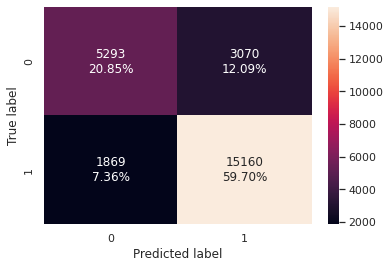

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_train2, y_train)

####Performance metrixs of the training set

In [309]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, x_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805411,0.890305,0.831469,0.859881


### ROC-AUC evaluation on the training data set

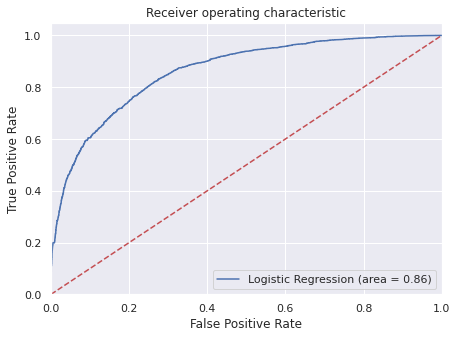

In [310]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2)) 
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observation:
* The model is performing well on the training set with an area under the curve = 0.86

### Model Performance Improvement
* Improve the recall score by chaging the model threshold using the ROC-AUC 

### Optimal threshold using AUC-ROC

In [311]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6289584820770271


#### Checking model performance on training set

* Confusion matrix

* Performance metrics

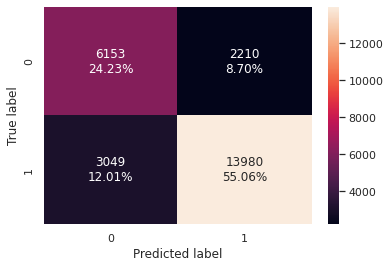

In [312]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [313]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792888,0.820952,0.863496,0.841687


* Model accuracy is slightly diminished
* Model is giving a recall score of 0.82 which is significanly less t compared to model which was giving a recall of 0.89 
* Precision has increased from 0.83 to 0.86

#### Using the Precision-Recall curve for performance improvement

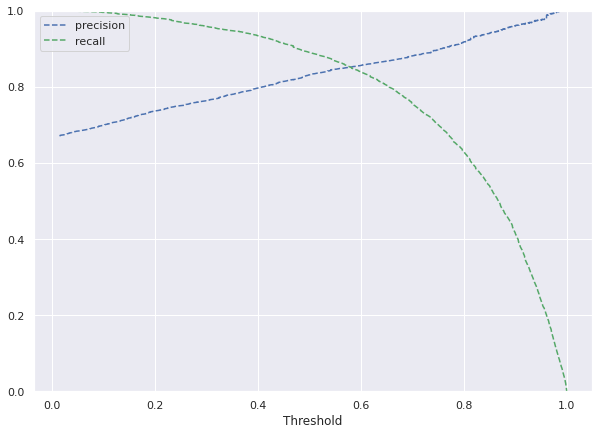

In [314]:
y_scores = lg2.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Observation:
* A threshold around 0.58 results in equal precision and recall
* Selecting a threshold value around 0.38 should increase recall and maintain adequate precision.

In [315]:
# setting the threshold
optimal_threshold_curve = 0.38

#### Checking traing model performance on training set with new threshold = 0.38
* Confusion Matrix
* Performance matrix

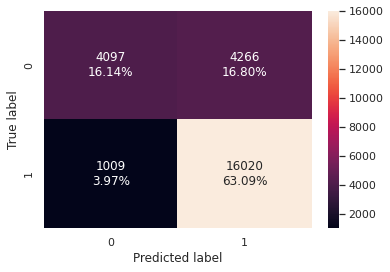

In [316]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_train2, y_train, threshold=optimal_threshold_curve)

In [317]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792257,0.940748,0.789707,0.858636


### Observations:

* Accuracy is slightly diminished
* Recall is increased from 0.89 to 0.94
* Precision is derceased from 0.83 to 0.79
* F1 score is virtually unchanged

### Model Performance Summary

In [318]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.805411,0.792888,0.792257
Recall,0.890305,0.820952,0.940748
Precision,0.831469,0.863496,0.789707
F1,0.859881,0.841687,0.858636


##Check model performance on the test set

#### dropping variables from test data that were removed from the training data set

In [319]:
x_test2 = x_test[x_train2.columns].astype(float)

### Model performance metrics with default threshold
* Confusion matrix
* Performance metrics
* ROC-UAC curve

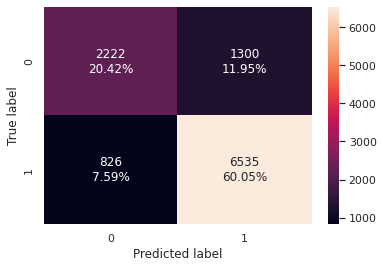

In [320]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_test2, y_test)

In [321]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, x_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804649,0.887787,0.834078,0.860095


### ROC-UAC curve using the test data set

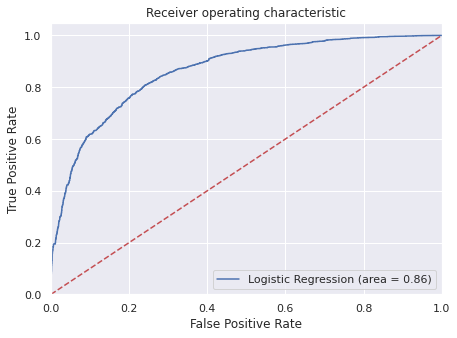

In [322]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model performance metrics with the optional threshold = 0.27
* Confusion matrix
* Performance metrics
* ROC-UAC curve

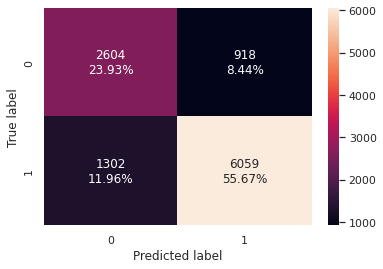

In [323]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_test2, y_test, threshold=optimal_threshold_auc_roc)

In [324]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796012,0.823122,0.868425,0.845167


### Model performance metrics with the optional threshold = 0.36
* Confusion matrix
* Performance metrics
* ROC-UAC curve

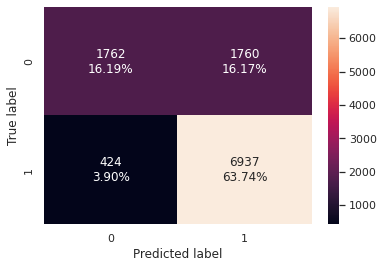

In [325]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_test2, y_test, threshold=optimal_threshold_curve)

In [326]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79932,0.942399,0.797631,0.863993


### Model performance summary
* Training data set performance metrics
* Test data set performance metrics

#### Training data set performance metrics

In [327]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.805411,0.792888,0.792257
Recall,0.890305,0.820952,0.940748
Precision,0.831469,0.863496,0.789707
F1,0.859881,0.841687,0.858636


#### Testing data set performance metrics

In [328]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.36 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.804649,0.796012,0.799320
Recall,0.887787,0.823122,0.942399
Precision,0.834078,0.868425,0.797631
F1,0.860095,0.845167,0.863993


## Final Model Summary

#### Comparision of Training and Testing results at the Logistic Regression Threshold at 0.36
* Accuracy results of the Test data is 0.8 is close to the Training results 0.79
* Recall results of the test data is 0.94 and virtually the same for the Training results
* Precision results of the Test data is 0.8 and virtually the same for the Training data
* F1 resuts for the Test data is 0.86 and virtually the same for the Training data

## **Section #8 - Building a Decision Tree model**

#### Copy of imported data file

In [393]:
# Make copy of initial data set
df2 = df.copy()

#### Remove Booking_ID variable

In [394]:
df2 = df2.drop(['Booking_ID'], axis=1)

#### Convert booking_status value to Canceled=0 and Not_Canceled=1 

In [395]:
# Convert booking_status value to Canceled=0 and Not_Canceled=1 
df2['booking_status'] = df2['booking_status'].apply(lambda x: 0 if x == 'Canceled' else 1)

In [396]:
X = df2.drop('booking_status', axis=1)
y = df2.pop('booking_status')

#### Convert categorical varibles unto dummy variable

In [397]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#### Split Data
* 70% training data set
* 30% testing data set

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

#### build Decision Tree model
* with the DecisionTreeClassifier function
* with default 'gini' criteria tfor the split

In [367]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Scoring the Decision Tree

In [368]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8696131581365433


In [369]:
#Checking number of positives
y.sum(axis = 0)

24390

### Load funtion to:
* Create confution matrix
* Calculate reacall score

In [370]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [371]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [451]:
##  Function to calculate performance
def get_perf_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    acc = accuracy_score(target, prediction)
    recall = recall_score(target, prediction)
    precision = precision_score(target, prediction)
    f1 = f1_score(target, prediction)

    df_perf1 = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0],)
        
    return df_perf1

##**1-Initial decision tree model**

#### Performance measures
* Confusion Matrix
* Recal results

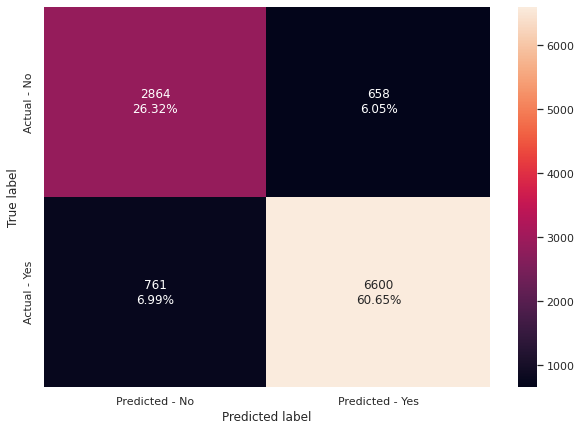

In [372]:
make_confusion_matrix(dTree,y_test)

In [373]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9957719184919842
Recall on test set :  0.8966173074310556


### Visualizing the Decision Tree
* Graphical representation
* Text description


In [374]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


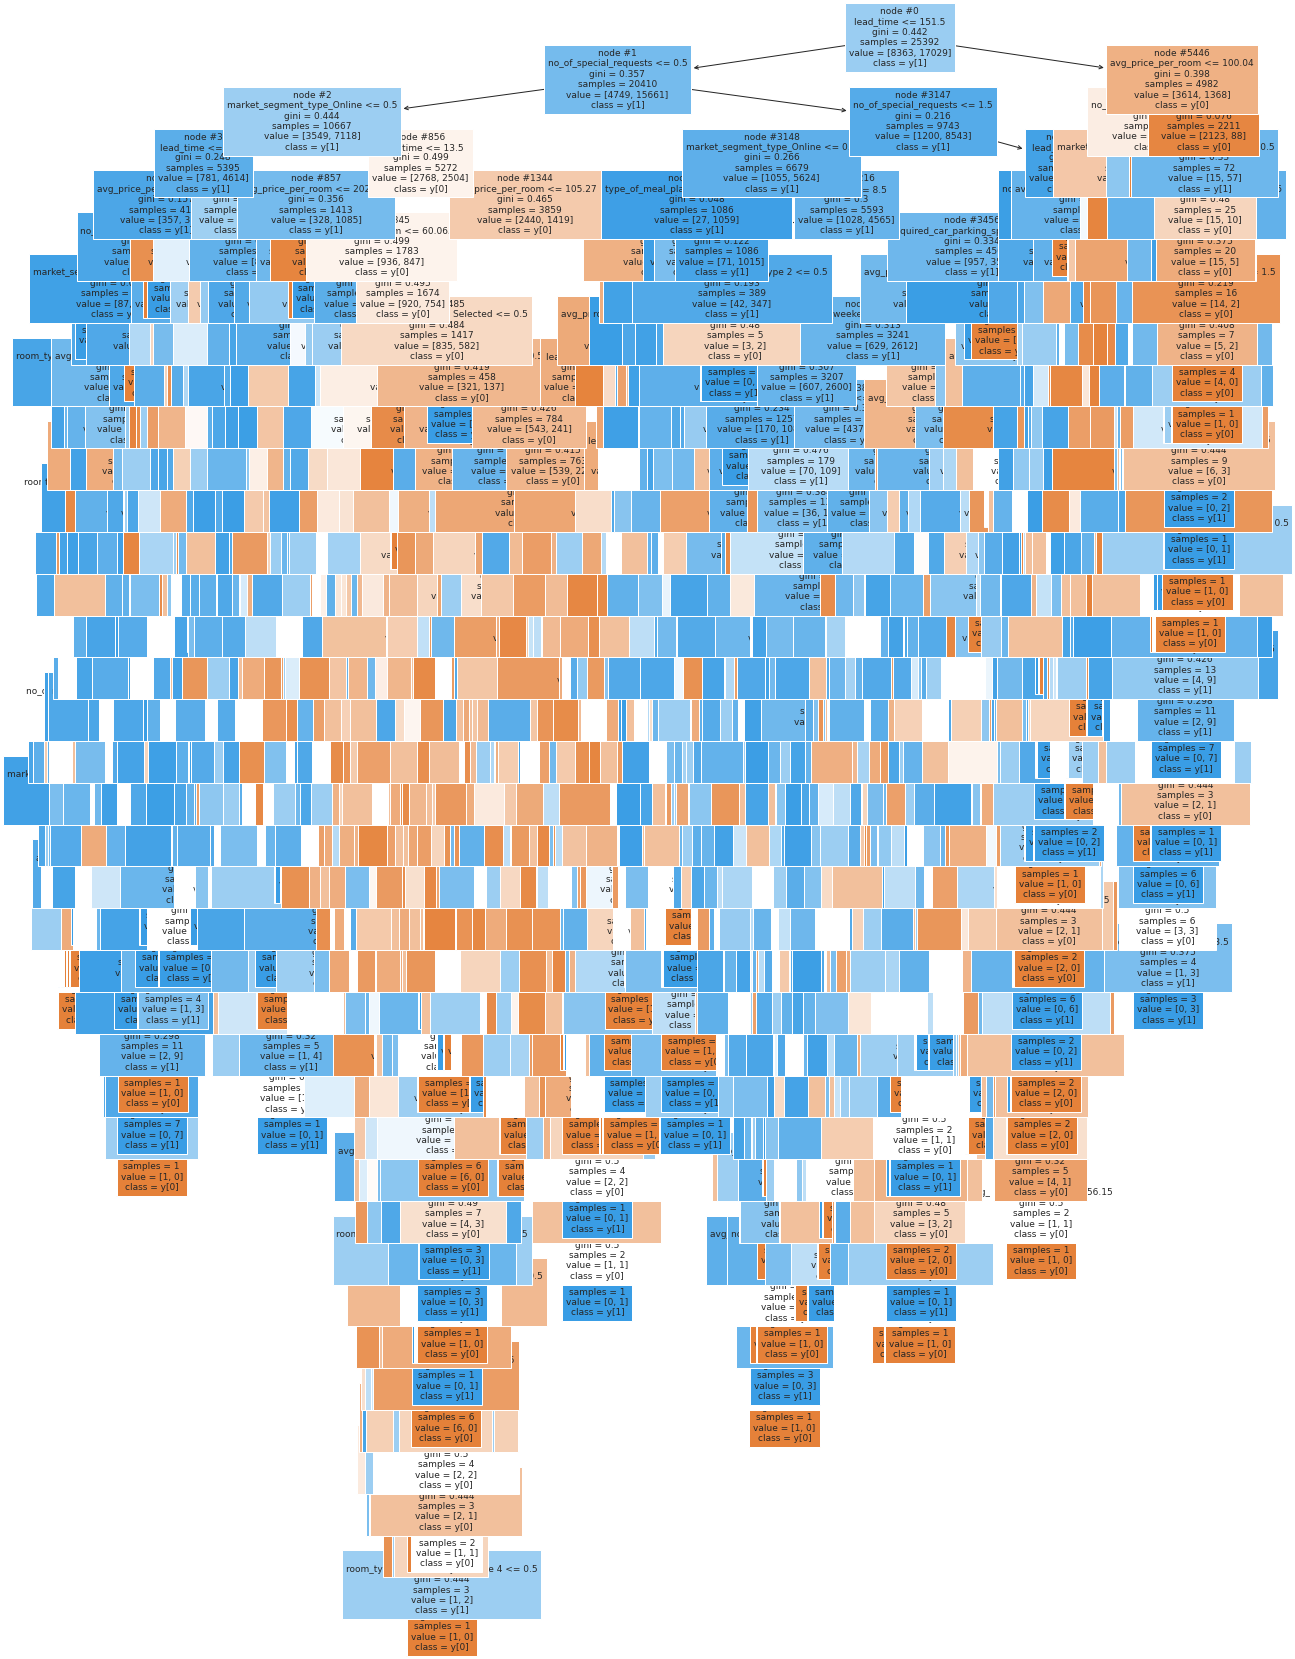

In [375]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Text report showing the rules of a decision tree

In [376]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 147.00] class: 1
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [377]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350353
avg_price_per_room                    0.177265
market_segment_type_Online            0.092345
arrival_date                          0.085259
no_of_special_requests                0.067948
arrival_month                         0.064570
no_of_week_nights                     0.045395
no_of_weekend_nights                  0.038528
no_of_adults                          0.027482
arrival_year                          0.011793
type_of_meal_plan_Not Selected        0.008234
room_type_reserved_Room_Type 4        0.006904
required_car_parking_space            0.006878
market_segment_type_Offline           0.003927
type_of_meal_plan_Meal Plan 2         0.003704
no_of_children                        0.003672
room_type_reserved_Room_Type 5        0.001681
room_type_reserved_Room_Type 2        0.001486
market_segment_type_Corporate         0.000646
repeated_guest                        0.000601
room_type_res

### Tornado diagram
* sorts independent variables by impact on the dependent variable 

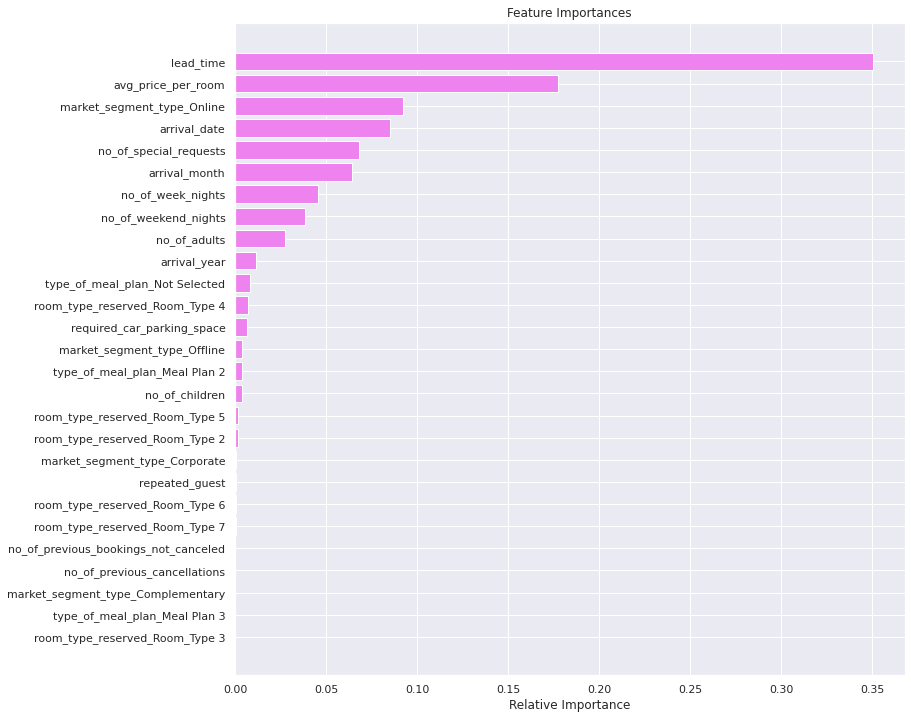

In [378]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations for **1-Initial decision tree model**:
* Produced a complex & crowded tree that is hard to interpret
* Tornado diagram indicated the 'Lead_time' variable has the greatest impact on predicting the dependent variable (cancelation)

## Do we need to prune the tree?
* Yes, the tree needs pruning
* The tree above is very complex, difficult to interpet
* Complex trees tend to be over fitted

##**2- Decision Tree with restricted maximum depth**

### Prune the tree
* Limiting the max_depth to three(3)

In [380]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Performance of the decision tree with depth restricted to 3
* Confusion Matrix
* Accuracy of the test and train data sets
* Recall of the test and train data sets

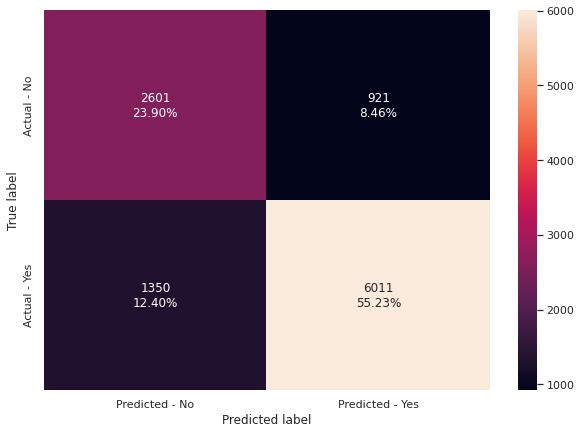

In [381]:
make_confusion_matrix(dTree1, y_test)

In [454]:
decision_tree_tune_perf_train = get_perf_score(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.919227,0.916906,0.960862,0.93837


### Observations:
* Recall on training data set has reduced from 1.0 to 0.0.81
* The is more generalizable
* Recall on test data set slightly reduced from 0.89 to 0.82

### Visualizing the Decision Tree with max_depth = 3
* graphical representation
* Text description

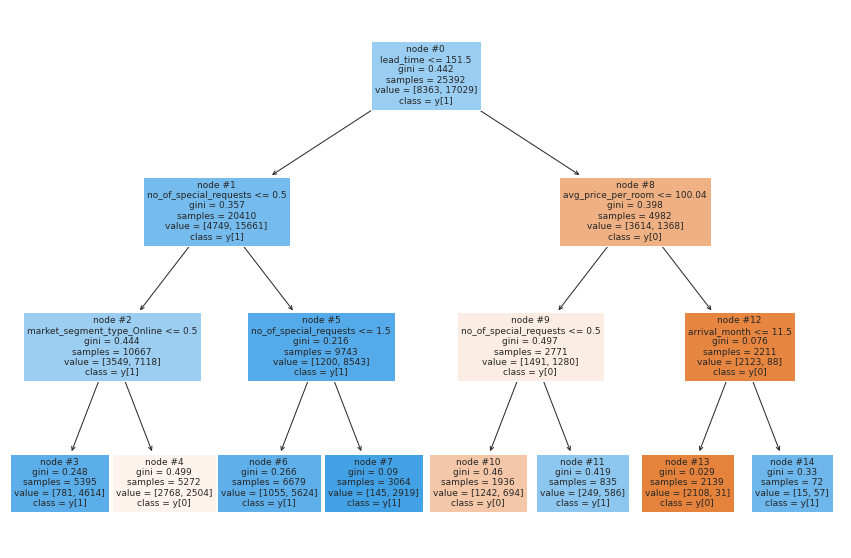

In [383]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [384]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [781.00, 4614.00] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2768.00, 2504.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [1055.00, 5624.00] class: 1
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [145.00, 2919.00] class: 1
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [1242.00, 694.00] class: 0
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [249.00, 586.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [2108.00, 31.00] class: 0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [15.00, 57.00] class: 1



### Observations
* Pruned tree is easier to interpret

### Tornado diagram

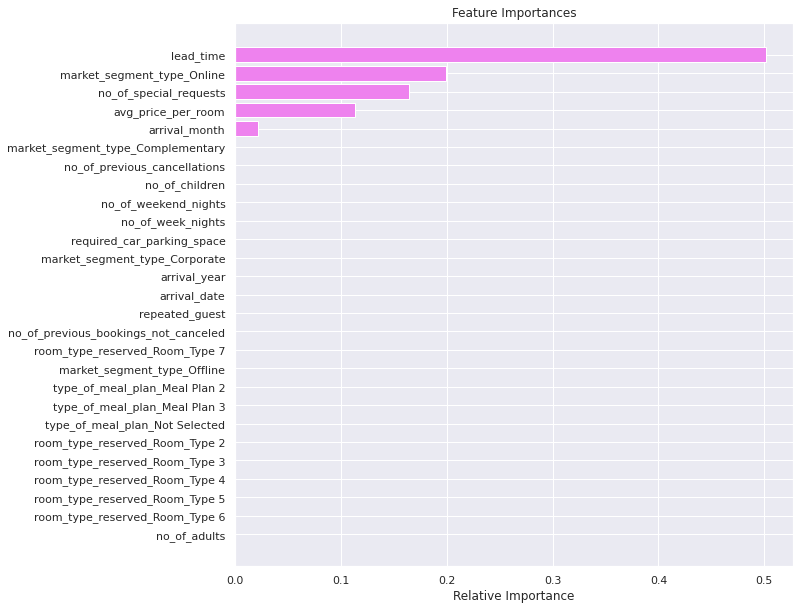

In [385]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observations for **2- Decision Tree with restricted maximum depth**
* The decision tree is simpler and easer to interpret
* The influencial independent variables remain in the reduced tree

##**3 -Using GridSearch for Hyperparameter tuning the tree model**

In [431]:
from sklearn.model_selection import GridSearchCV

In [432]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.65, 1: 0.35})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.65, 1: 0.35}, max_depth=15,
                       min_impurity_decrease=1e-05, random_state=1)

### Decision tree performance with tuned hyperparameters
* Confusion Matrix
* Accuracy results
Recall results 

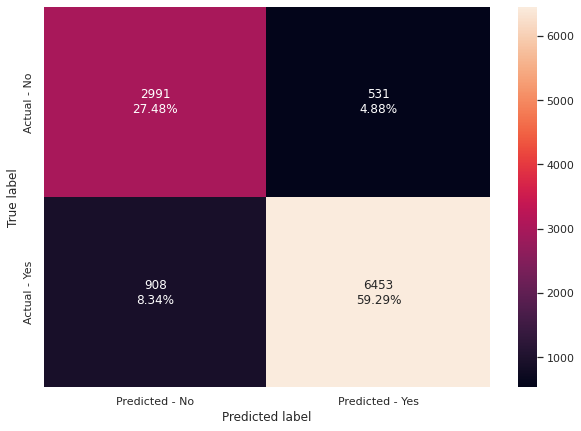

In [433]:
make_confusion_matrix(estimator,y_test)

In [453]:
decision_tree_tune_perf_train = get_perf_score(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.919227,0.916906,0.960862,0.93837


### Visualizing the Decision Tree
* Graphical display
* Text description

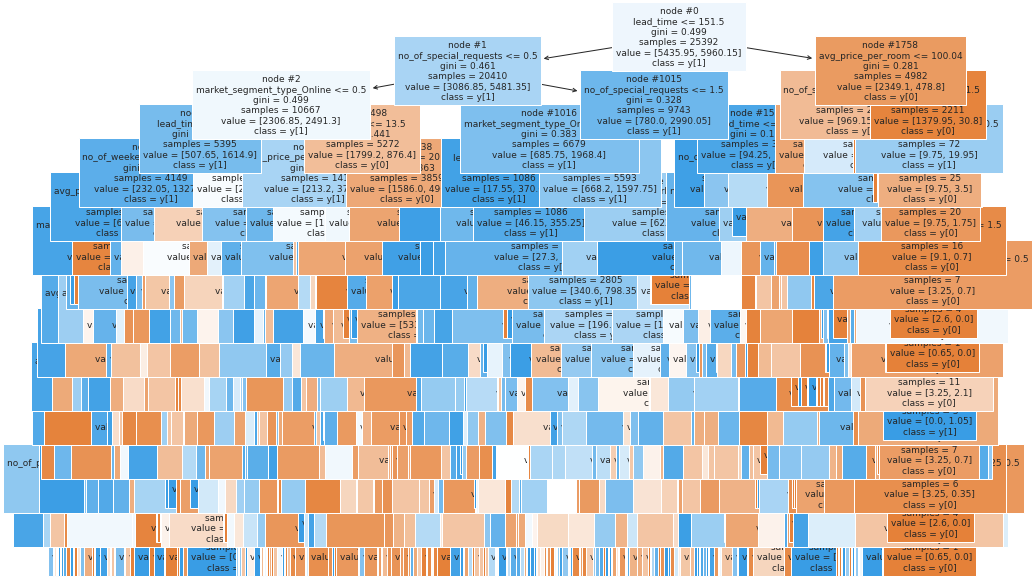

In [435]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [409]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 22.05] class: 1
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 38.15] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room 

In [410]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                           Imp
lead_time                             0.378220
avg_price_per_room                    0.134599
market_segment_type_Online            0.128092
no_of_special_requests                0.106972
arrival_month                         0.060729
arrival_date                          0.050188
no_of_week_nights                     0.033755
no_of_weekend_nights                  0.027847
no_of_adults                          0.027274
arrival_year                          0.021123
required_car_parking_space            0.008534
type_of_meal_plan_Not Selected        0.005654
market_segment_type_Offline           0.003287
room_type_reserved_Room_Type 4        0.003283
no_of_children                        0.002419
type_of_meal_plan_Meal Plan 2         0.002152
room_type_reserved_Room_Type 2        0.002022
market_segment_type_Corporate         0.001460
room_type_reserved_Room_Type 5        0.000981
no_of_previous_bookings_not_canceled  0.000466
repeated_gues

#### Tornado diagram

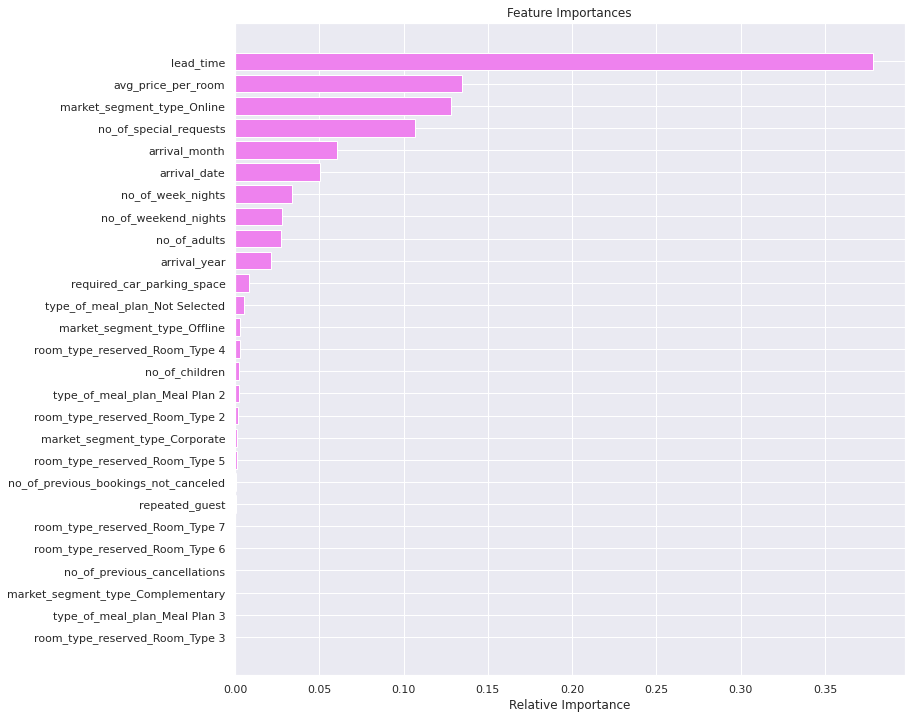

In [411]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observations for **3 -Using GridSearch for Hyperparameter tuning the tree model**
* The decision tree very complex and difficult to interpret
* The influencial independent variables remain in the reduced tree

##**4 - Cost Complexity Pruning**

In [436]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [437]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,4.327745e-07,0.007573
2,4.688391e-07,0.007573
3,5.329960e-07,0.007574
4,6.133547e-07,0.007575
...,...,...
1340,6.665684e-03,0.286897
1341,1.304480e-02,0.299942
1342,1.725993e-02,0.317202
1343,2.399048e-02,0.365183


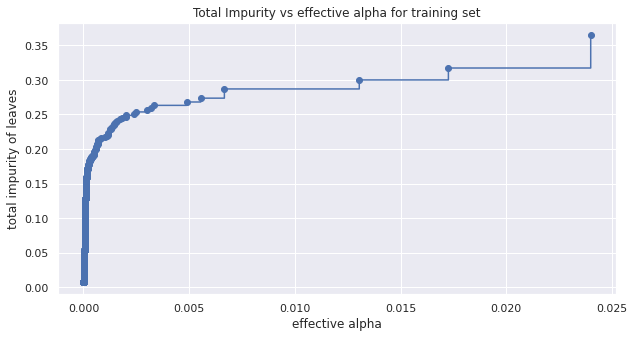

In [438]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [439]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

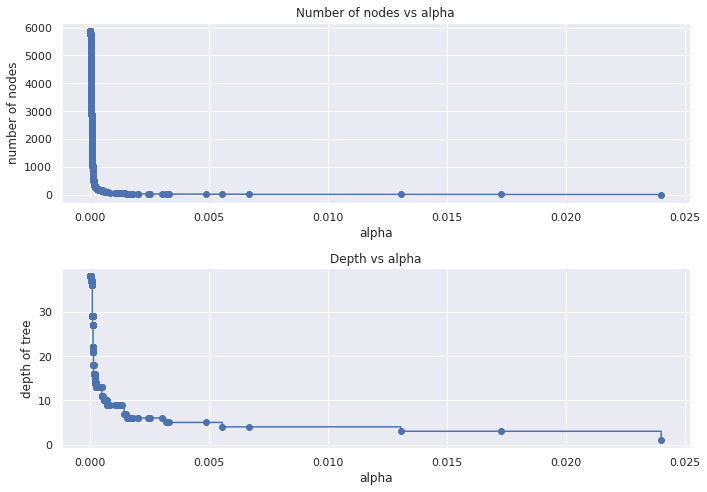

In [440]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [441]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

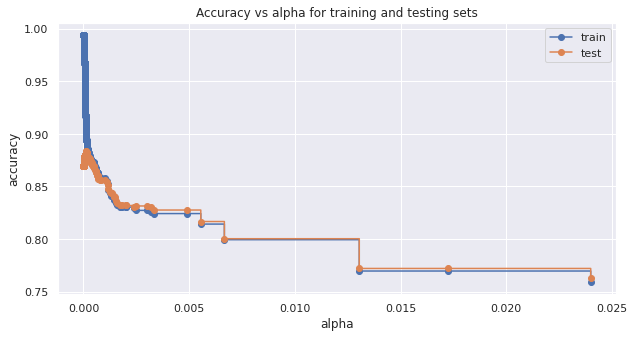

In [442]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [443]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00011736595788977046, random_state=1)
Training accuracy of best model:  0.9029615626969124
Test accuracy of best model:  0.883304235964348


#### Since accuracy isn't the right metric for our data we would want high recall

In [444]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [421]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

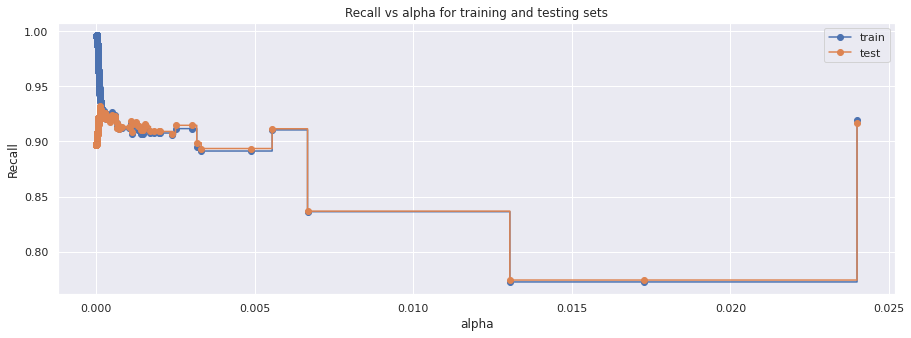

In [445]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [446]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012717831407730315, random_state=1)


### Performance - post-pruned decision tree
* Confusion matrix
* Performance metrics

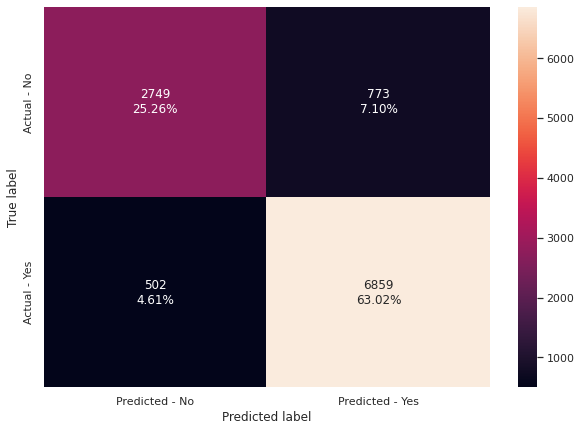

In [424]:
make_confusion_matrix(best_model,y_test)

In [425]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9417464325562276
Recall on test set :  0.9318027441923652


#### Comments
* With post-pruning we get the highest recall on both training and test set

## Visualizing the Decision Tree

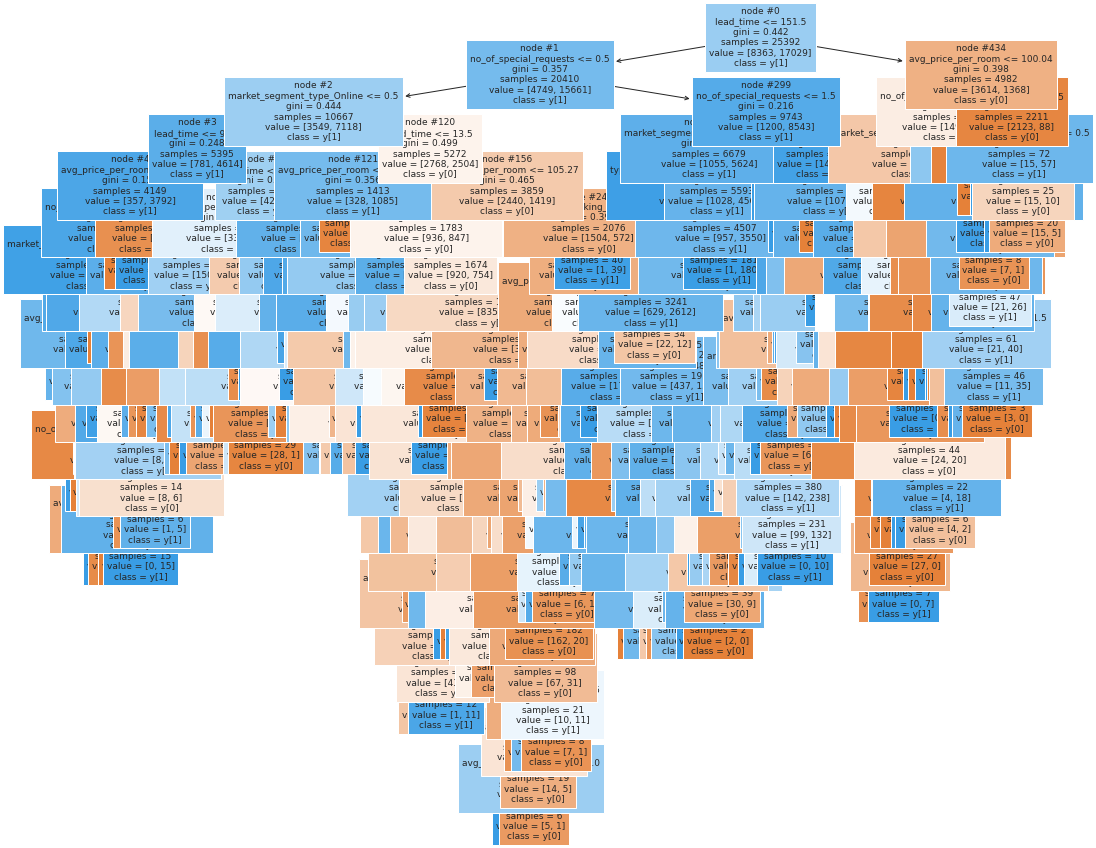

In [447]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [448]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- weights: [43.00, 558.00] class: 1
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [36.00, 162.00] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1609.00] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- lead_time <= 

In [449]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.402838
avg_price_per_room                    0.155707
market_segment_type_Online            0.138645
no_of_special_requests                0.100398
arrival_month                         0.056324
arrival_date                          0.034973
no_of_weekend_nights                  0.031197
no_of_adults                          0.023968
no_of_week_nights                     0.017755
arrival_year                          0.014170
required_car_parking_space            0.010020
market_segment_type_Offline           0.005098
type_of_meal_plan_Not Selected        0.002692
type_of_meal_plan_Meal Plan 2         0.002174
room_type_reserved_Room_Type 4        0.001874
room_type_reserved_Room_Type 5        0.001078
room_type_reserved_Room_Type 2        0.000613
no_of_children                        0.000475
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

#### Tornado diagram

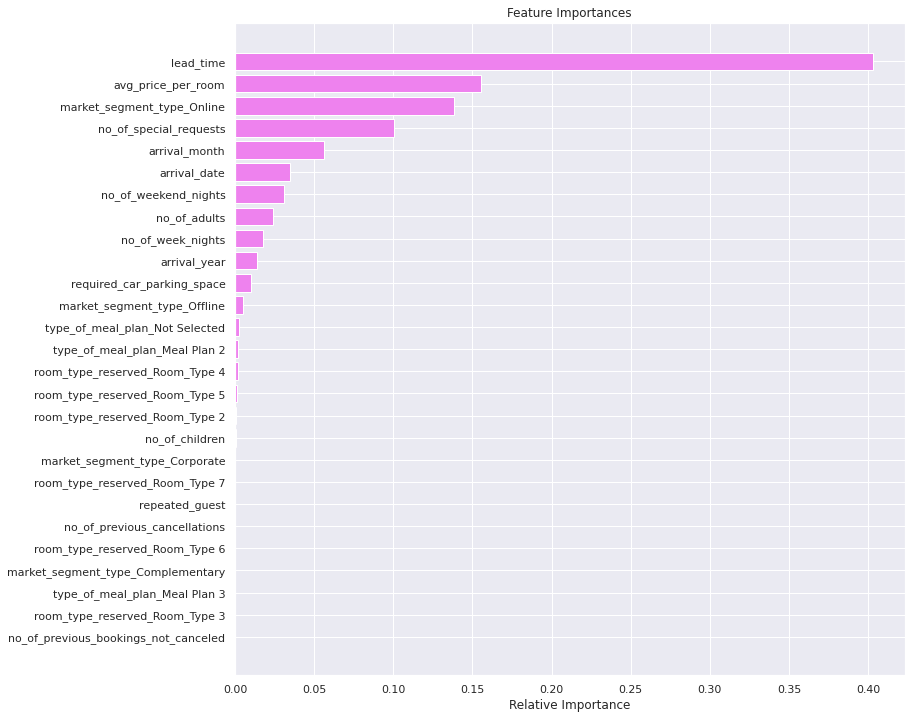

In [450]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
decision_tree_tune_perf_train = get_perf_score(estimator, X_train, y_train)
decision_tree_tune_perf_train

## Observations for **4 - Cost Complexity Pruning**
* The decision tree very complex and difficult to interpret
* The influencial independent variables remain in the reduced tree

## **Model Performance Comparison and Conclusions**

* The Tornado Diagrams of all four Decision Trees identified the variable 'lead_time' had a greatest effect on cancelations.
* The Decision tree with restricted maximum depth is the only tree that is interpretable

## Comparing all the decision tree models

In [430]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.53,0.51,0.63], 'Test_Recall':[0.46,0.46,0.46,0.56]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.46
1,Decision tree with restricted maximum depth,0.53,0.46
2,Decision treee with hyperparameter tuning,0.51,0.46
3,Decision tree with post-pruning,0.63,0.56


### Observations
* A Decision Tree Model with high Test Recall results is the most desirable in this business case
* The Decision tree with post-pruning gave the most desirable Recall results
* The Desision tree with restricted maximum depth is much easier to interpret and share with the client

##**Section #9 - Observations and Recomendations**

### This analysis provides three deliverables to the client:

**1- analyze the data provided to find which factors have a high influence on booking cancellations**
* bookings with higher lead times had a pattern of higher cancelations as well
* average price per room was associated with higher cancelations
* Booking rooms via Online had a pattern of lower cancelations
* Customers who made a higher number of special requests had a patter of cancellations

**2- build a predictive model that can predict which booking is going to be canceled in advance**
* ML model is able to predict cancelations or no cancelations for bookings with high confidence.
* A Decision tree with restricted maximum depth and Tornado Diagram shows the influential variables affecting cancellations. Specifically Lead time, Online bookings, the number of special requests, and room price.

## Actionable Insights and Recommendations

**3- Formulate profitable policies for cancellations and refunds.**
* Hotel policies need to take into consideration the leading variables impacting cancelations. Specifically Lead time, Online bookings, the number of special requests, and room price. 
* Lead time was identified as the most important feature, with a longer lead time leading to cancelations. Policies need to be introduced to restrict how far in advance bookings can be made before the scheduled date
* Customers who booked rooms with the online system had fewer cancelations compared to other booking methods. Recommend incentivizing customers to use the online system or redesigning the online reservation system to attract more customers.
* Review the type of special requests offered. A customer and staff survey may provide insights into why customers who have a higher number of special requests also have an increased number of cancelations. 
* Across all market segments, avg price per room has been higher in instances where bookings have been canceled than in instances where bookings have not been canceled. More marketing analysis is required to ensure that pricing is competitive to attract bookings

**Additional recommendations**
* 2018 bookings are substantially greater than 2017. It is worth investigating key drivers for this increase.
* Bookings in January, February, and March are substantially lower than all other months; suggest developing activities that increase off-season bookings. Also, recommend reviewing staff expenses during these months.
* Data did not include customer satisfaction scores or information on 
hotel features that were key factors customers booked rooms with the hotel.
* The #1 meal plan is very popular. While meal plans 2 and 3 have few takers. Suggest reviewing if the hotel should discontinue offering these meal plans. 